### Libraries

In [183]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 991.0 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 4.3 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [185]:
pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 1.4 MB/s eta 0:01:15
   ---------------------------------------- 0.2/101.7 MB 3.3 MB/s eta 0:00:31
   ---------------------------------------- 1.1/101.7 MB 9.7 MB/s eta 0:00:11
   - -------------------------------------- 2.6/101.7 MB 16.6 MB/s eta 0:00:06
   - -------------------------------------- 4.9/101.7 MB 24.3 MB/s eta 0:00:04
   -- ------------------------------------- 7.3/101.7 MB 29.0 MB/s eta 0:00:04
   --- ------------------------------------ 9.4/101.7 MB 31.8 MB/s eta 0:00:03
   ---- ----------------------------------- 10.9/101.7 MB 43.7 MB/s eta 0:00:03
   ----- ---------------------------------- 12.8/101.7 MB 43.7 MB/s eta 0:00:03
   ----- ---------------------------------- 14.9/101.7 MB 43.7 MB/s eta 0:00:02
   ------ --------------------------------- 17.2/101.7 MB 43.7 MB/s eta 0:00:02
   ------- -------------------------------- 19.4/101.7 MB 4

In [357]:
#Libraries
import pandas as pd
import numpy as np
import calendar
import datetime as dt
import warnings

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType, IntegerType, DateType

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [187]:
#ML Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [359]:
#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Description

## Read Data

In [329]:
df=pd.read_csv('ml_data.csv')
df.head()

,order_id,order_item_id,freight_value,cargo_time,delivery_time,estimate_time,cargo_volume_cm3,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,seller_state,seller_score,customer_id,customer_city,customer_state,distance_id,seller_state_area,seller_state_population,seller_state_density,customer_state_area,customer_state_population,customer_state_density,states_distance
0,e481f51cbdc54678b7cc49136f2d6af7,1,8.720,2.374,8.437,15.544,1976.000,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,4.481,9ef432eb6251297304e76186b10a928d,sao paulo,SP,SPSP,248222,45919049,184.900,248222,45919049,184.900,0.000
1,53cdb2fc8bc7dce0b6741e2150273451,1,22.760,1.743,13.782,19.138,4693.000,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,belo horizonte,MG,4.590,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,BA,MGBA,586528,21168791,36.100,564733,14873064,26.300,846.430
2,47770eb9100c2d0c44946d9cf07ec65d,1,19.220,0.216,9.394,26.640,9576.000,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,4.145,41ce2a54c0b03bf3443c3d931a367089,vianopolis,GO,SPGO,248222,45919049,184.900,340111,7018354,20.600,920.910
3,949d5b44dbf5de918fe9c16f97b45f8a,1,27.200,3.758,13.209,26.189,6000.000,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,belo horizonte,MG,4.473,f88197465ea7920adcdbec7375364d82,sao goncalo do amarante,RN,MGRN,586528,21168791,36.100,52811,3506853,66.400,1757.890
4,ad21c59c0840e6cb83a9ceb5573f8159,1,8.720,0.936,2.874,12.112,11475.000,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,mogi das cruzes,SP,4.113,8ab97904e6daea8866dbdbc4fb7aad2c,santo andre,SP,SPSP,248222,45919049,184.900,248222,45919049,184.900,0.000


## Describe Data

In [8]:
df.shape

(110197, 26)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   order_item_id                  110197 non-null  int64  
 2   freight_value                  110197 non-null  float64
 3   cargo_time                     110195 non-null  float64
 4   delivery_time                  110189 non-null  float64
 5   estimate_time                  110197 non-null  float64
 6   cargo_volume_cm3               110179 non-null  float64
 7   order_purchase_timestamp       110197 non-null  object 
 8   order_delivered_carrier_date   110195 non-null  object 
 9   order_delivered_customer_date  110189 non-null  object 
 10  order_estimated_delivery_date  110197 non-null  object 
 11  seller_id                      110197 non-null  object 
 12  seller_city                   

## Null Check

In [11]:
df.isnull().sum()

order_id                          0
order_item_id                     0
freight_value                     0
cargo_time                        2
delivery_time                     8
estimate_time                     0
cargo_volume_cm3                 18
order_purchase_timestamp          0
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
seller_id                         0
seller_city                       0
seller_state                      0
seller_score                     17
customer_id                       0
customer_city                     0
customer_state                    0
distance_id                       0
seller_state_area                 0
seller_state_population           0
seller_state_density              0
customer_state_area               0
customer_state_population         0
customer_state_density            0
states_distance                   0
dtype: int64

In [12]:
df[df['delivery_time'].isna()]

,order_id,order_item_id,freight_value,cargo_time,delivery_time,estimate_time,cargo_volume_cm3,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,seller_state,seller_score,customer_id,customer_city,customer_state,distance_id,seller_state_area,seller_state_population,seller_state_density,customer_state_area,customer_state_population,customer_state_density,states_distance
3291,2d1e2d5bf4dc7227b3bfebb81328c15f,1,17.53,2.0196,NaN,19.2610,44890.0,2017-11-28 17:44:07,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00,8581055ce74af1daba164fdbd55a40de,guarulhos,SP,4.260638,ec05a6d8558c6455f0cbbd8a420ad34f,cerquilho,SP,SPSP,248222,45919049,184.9,248222,45919049,184.9,0.00
22829,f5dd62b788049ad9fc0526e3ad11a097,1,25.24,5.0460,NaN,25.7092,33048.0,2018-06-20 06:58:43,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00,0bb738e4d789e63e2267697c42d35a2d,sao roque,SP,4.600000,5e89028e024b381dc84a13a3570decb4,quadra,SP,SPSP,248222,45919049,184.9,248222,45919049,184.9,0.00
48549,2ebdfc4f15f23b91474edf87475f108e,1,19.07,1.8693,NaN,28.2881,3136.0,2018-07-01 17:05:11,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00,58f1a6197ed863543e0136bdedb3fce2,conselheiro lafaiete,MG,4.255814,29f0540231702fda0cfdee0a310f11aa,pindamonhangaba,SP,MGSP,586528,21168791,36.1,248222,45919049,184.9,497.63
87714,e69f75a717d64fc5ecdfae42b2e8e086,1,19.07,1.6605,NaN,28.0792,3136.0,2018-07-01 22:05:55,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00,58f1a6197ed863543e0136bdedb3fce2,conselheiro lafaiete,MG,4.255814,cfda40ca8dd0a5d486a9635b611b398a,sumare,SP,MGSP,586528,21168791,36.1,248222,45919049,184.9,497.63
91678,0d3268bad9b086af767785e3f0fc0133,1,15.63,1.5097,NaN,22.1153,22977.0,2018-07-01 21:14:02,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00,8bdd8e3fd58bafa48af76b2c5fd71974,sao paulo,SP,4.545455,4f1d63d35fb7c8999853b2699f5c7649,sao carlos,SP,SPSP,248222,45919049,184.9,248222,45919049,184.9,0.00
102597,2d858f451373b04fb5c984a1cc2defaf,1,15.00,NaN,NaN,28.0259,17576.0,2017-05-25 23:22:43,NaN,NaN,2017-06-23 00:00:00,f9bbdd976532d50b7816d285a22bd01e,sao paulo,SP,5.000000,e08caf668d499a6d643dafd7c5cc498a,porto alegre,RS,SPRS,248222,45919049,184.9,281748,11377239,40.4,956.95
108162,ab7c89dc1bf4a1ead9d6ec1ec8968a84,1,9.13,4.0836,NaN,17.4933,4800.0,2018-06-08 12:09:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00,ed4acab38528488b65a9a9c603ff024a,sao paulo,SP,3.718750,dd1b84a7286eb4524d52af4256c0ba24,guarulhos,SP,SPSP,248222,45919049,184.9,248222,45919049,184.9,0.00
108601,20edc82cf5400ce95e1afacc25798b31,1,9.07,6.1367,NaN,21.3269,6552.0,2018-06-27 16:09:12,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00,343e716476e3748b069f980efbaa294e,campinas,SP,4.312500,28c37425f1127d887d7337f284080a0f,ribeirao pires,SP,SPSP,248222,45919049,184.9,248222,45919049,184.9,0.00


In [13]:
df[df['cargo_time'].isna()]

,order_id,order_item_id,freight_value,cargo_time,delivery_time,estimate_time,cargo_volume_cm3,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,seller_state,seller_score,customer_id,customer_city,customer_state,distance_id,seller_state_area,seller_state_population,seller_state_density,customer_state_area,customer_state_population,customer_state_density,states_distance
81065,2aa91108853cecb43c84a5dc5b277475,1,14.98,NaN,52.4527,45.6299,44000.0,2017-09-29 08:52:58,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00,3f2af2670e104d1bcb54022274daeac5,terra boa,PR,3.333333,afeb16c7f46396c0ed54acb45ccaaa40,indaiatuba,SP,PRSP,199314,11433957,57.4,248222,45919049,184.9,447.37
102597,2d858f451373b04fb5c984a1cc2defaf,1,15.00,NaN,NaN,28.0259,17576.0,2017-05-25 23:22:43,NaN,NaN,2017-06-23 00:00:00,f9bbdd976532d50b7816d285a22bd01e,sao paulo,SP,5.000000,e08caf668d499a6d643dafd7c5cc498a,porto alegre,RS,SPRS,248222,45919049,184.9,281748,11377239,40.4,956.95


In [14]:
df[df['cargo_volume_cm3'].isna()]

,order_id,order_item_id,freight_value,cargo_time,delivery_time,estimate_time,cargo_volume_cm3,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,seller_state,seller_score,customer_id,customer_city,customer_state,distance_id,seller_state_area,seller_state_population,seller_state_density,customer_state_area,customer_state_population,customer_state_density,states_distance
8130,6e150190fbe04c642a9cf0b80d83ee16,1,16.79,4.9827,13.0849,36.3100,NaN,2017-06-24 16:33:35,2017-06-29 16:08:40,2017-07-07 18:35:52,2017-07-31 00:00:00,4e922959ae960d389249c378d1c939f5,jacarei,SP,3.961165,135a42a465867ff932f1222f71a3efb2,barra do garcas,MT,SPMT,248222,45919049,184.9,903357,3484466,3.8,1326.42
8570,d38dcb503cd4ddc6ce7702552918bd8f,1,15.10,0.9370,9.9541,30.2609,NaN,2017-06-04 17:44:18,2017-06-05 16:13:33,2017-06-14 16:38:11,2017-07-05 00:00:00,4e922959ae960d389249c378d1c939f5,jacarei,SP,3.961165,b0a3a02fe893d9a9385a98db1348244b,porto alegre,RS,SPRS,248222,45919049,184.9,281748,11377239,40.4,956.95
8571,d38dcb503cd4ddc6ce7702552918bd8f,2,15.10,0.9370,9.9541,30.2609,NaN,2017-06-04 17:44:18,2017-06-05 16:13:33,2017-06-14 16:38:11,2017-07-05 00:00:00,4e922959ae960d389249c378d1c939f5,jacarei,SP,3.961165,b0a3a02fe893d9a9385a98db1348244b,porto alegre,RS,SPRS,248222,45919049,184.9,281748,11377239,40.4,956.95
20937,ddf16d77e858a32f36e10c289a28ef61,1,14.52,1.0162,11.0877,23.5581,NaN,2017-04-24 10:36:24,2017-04-25 10:59:46,2017-05-05 12:42:39,2017-05-18 00:00:00,4e922959ae960d389249c378d1c939f5,jacarei,SP,3.961165,84cc013dd1790fdafb0fa598695cf3c3,sao jose do cedro,SC,SPSC,248222,45919049,184.9,95736,7164788,75.6,555.74
31202,1521c6bb7b1028154c8c67cf80fa809f,1,16.05,2.2633,16.1620,31.5828,NaN,2017-04-02 10:00:43,2017-04-04 16:19:55,2017-04-18 13:53:58,2017-05-04 00:00:00,4e922959ae960d389249c378d1c939f5,jacarei,SP,3.961165,ca29b2bf57243228e98eab2dab805ae9,brasilia,DF,SPDF,248222,45919049,184.9,5802,3015268,520.2,868.46
35187,e3daea0200104991cb979c2fcc509ae7,1,10.96,1.3325,8.0249,25.4113,NaN,2017-03-30 14:07:44,2017-03-31 22:06:32,2017-04-07 14:43:38,2017-04-25 00:00:00,4e922959ae960d389249c378d1c939f5,jacarei,SP,3.961165,4730251e8934a542a009d77dfd027375,brodowski,SP,SPSP,248222,45919049,184.9,248222,45919049,184.9,0.00
39597,415cfaaaa8cea49f934470548797fed1,1,14.52,10.7584,26.9921,29.5655,NaN,2017-04-02 10:25:38,2017-04-13 04:37:45,2017-04-29 10:14:19,2017-05-02 00:00:00,4e922959ae960d389249c378d1c939f5,jacarei,SP,3.961165,a8dff6357fea30071032ff2091d16430,arapongas,PR,SPPR,248222,45919049,184.9,199314,11433957,57.4,447.37
39598,415cfaaaa8cea49f934470548797fed1,2,14.52,10.7584,26.9921,29.5655,NaN,2017-04-02 10:25:38,2017-04-13 04:37:45,2017-04-29 10:14:19,2017-05-02 00:00:00,4e922959ae960d389249c378d1c939f5,jacarei,SP,3.961165,a8dff6357fea30071032ff2091d16430,arapongas,PR,SPPR,248222,45919049,184.9,199314,11433957,57.4,447.37
42464,85f8ad45e067abd694b627859fa57453,1,27.00,3.3090,8.5458,37.0972,NaN,2017-01-29 21:40:02,2017-02-02 05:04:58,2017-02-07 10:46:00,2017-03-08 00:00:00,8b8cfc8305aa441e4239358c9f6f2485,londrina,PR,4.200000,1d088dea8732788ec35dd4ee6dd76112,porto alegre,RS,PRRS,199314,11433957,57.4,281748,11377239,40.4,695.93
45620,101157d4fae1c9fb74a00a5dee265c25,1,14.52,9.0442,10.5511,28.6704,NaN,2017-04-03 07:54:34,2017-04-12 08:58:13,2017-04-13 21:08:08,2017-05-02 00:00:00,4e922959ae960d389249c378d1c939f5,jacarei,SP,3.961165,f72b2f8d9295ef93fd40a4c49f67a42b,rio de janeiro,RJ,SPRJ,248222,45919049,184.9,43796,17264943,394.2,357.84


In [15]:
df[df['seller_score'].isna()]

,order_id,order_item_id,freight_value,cargo_time,delivery_time,estimate_time,cargo_volume_cm3,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,seller_state,seller_score,customer_id,customer_city,customer_state,distance_id,seller_state_area,seller_state_population,seller_state_density,customer_state_area,customer_state_population,customer_state_density,states_distance
11260,42ae1967f68c90bb325783ac55d761ce,1,15.59,1.1244,5.9951,10.5109,42330.0,2017-06-26 11:44:22,2017-06-27 14:43:28,2017-07-02 11:37:22,2017-07-07 00:00:00,07a9bc7f61396b658ddf3ac534efe44c,sao paulo,SP,NaN,a7de5fdc43e51f84437e88b447da5fc2,sao paulo,SP,SPSP,248222,45919049,184.9,248222,45919049,184.9,0.00
31395,fefacc66af859508bf1a7934eab1e97f,1,193.21,8.8554,20.8664,15.2429,45684.0,2018-07-25 18:10:17,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,80ceebb4ee9b31afb6c6a916a574a1e2,londrina,PR,NaN,f48d464a0baaea338cb25f816991ab1f,vitoria,ES,PRES,199314,11433957,57.4,46095,4018650,87.2,1171.35
36435,34fdc362961364d3ff08986ccff2212d,3,13.99,0.7574,6.0570,20.2636,1584.0,2018-05-08 17:40:24,2018-05-09 11:51:00,2018-05-14 19:02:25,2018-05-29 00:00:00,c240c4061717ac1806ae6ee72be3533b,rio de janeiro,RJ,NaN,c2719bf8e555adcf1fa503708bea998c,sao paulo,SP,RJSP,43796,17264943,394.2,248222,45919049,184.9,357.84
37201,0e659173ebf2a1d39e076be9bd0b2872,1,17.78,1.9828,6.3397,46.6370,7200.0,2017-02-01 08:42:43,2017-02-03 08:17:54,2017-02-07 16:51:49,2017-03-20 00:00:00,3a52d63a8f9daf5a28f3626d7eb9bd28,brasilia,DF,NaN,9333fb1c5675b69afe49a9cf6b91defe,tubarao,SC,DFSC,5802,3015268,520.2,95736,7164788,75.6,1301.17
45944,a56e54593f2c7f2b10f69216a7265aa5,1,23.13,10.2389,16.2898,29.6190,9856.0,2017-03-25 09:08:41,2017-04-04 14:52:38,2017-04-10 16:06:03,2017-04-24 00:00:00,52f6f9f13ba19504c02781132a049e75,curitiba,PR,NaN,5c56ccc96c52168daa5ab5fa7038bee9,rio de janeiro,RJ,PRRJ,199314,11433957,57.4,43796,17264943,394.2,804.92
46104,b866af202be0692766081310cd4085e1,2,14.61,23.4811,18.5378,79.3755,6400.0,2017-01-27 14:59:17,2017-02-20 02:32:08,2017-02-15 03:53:46,2017-04-17 00:00:00,0b09101900100c0e9d312861fad5a1b9,sao paulo,SP,NaN,d1800078046ed2e5ae1b0792b695c56e,sao paulo,SP,SPSP,248222,45919049,184.9,248222,45919049,184.9,0.00
49823,cf5dc40ae925414c07d1a74645ced6c2,2,30.41,2.9812,7.2801,30.3881,6783.0,2018-07-06 14:41:04,2018-07-09 14:14:00,2018-07-13 21:24:28,2018-08-06 00:00:00,9315e491484b1b0081ca166fc164108d,londrina,PR,NaN,3c97b23a8b4e6e6e186ed13e99d295e2,capao da canoa,RS,PRRS,199314,11433957,57.4,281748,11377239,40.4,695.93
49865,d6cd9d63e25452e0278cb6eeed08de6b,2,23.45,2.8228,16.0428,38.2451,10500.0,2018-08-04 18:07:07,2018-08-07 13:52:00,2018-08-20 19:08:48,2018-09-12 00:00:00,5415337f1863452476d42d9f14a16a61,belo horizonte,MG,NaN,b98012e4b861b35a2b4cf3876dcbaf78,fortaleza,CE,MGCE,586528,21168791,36.1,148920,9132078,61.3,1703.45
50206,64bd3e880a66ec01c58e06862dcb82fc,1,12.69,3.6630,4.7878,20.0292,37200.0,2017-06-08 23:17:57,2017-06-12 15:12:40,2017-06-13 18:12:24,2017-06-29 00:00:00,6614814a00d344b846ae209f95ee7e3f,macatuba,SP,NaN,de3e67c69d744169029b17ee09040116,sao paulo,SP,SPSP,248222,45919049,184.9,248222,45919049,184.9,0.00
52676,cf5c8d9f52807cb2d2f0a0ff54c478da,5,9.00,-0.0445,6.2554,41.4555,9702.0,2018-08-24 13:04:05,2018-08-24 12:00:00,2018-08-30 19:11:50,2018-10-05 00:00:00,1fa2d3def6adfa70e58c276bb64fe5bb,sao paulo,SP,NaN,e898b5ef24833b9cb9e2d4f00b937595,cuiaba,MT,SPMT,248222,45919049,184.9,903357,3484466,3.8,1326.42


## Describe Numeric Data

In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,110197.000,1.198,0.707,1.000,1.000,1.000,1.000,21.000
freight_value,110197.000,19.949,15.698,0.000,13.080,16.260,21.150,409.680
cargo_time,110195.000,3.284,3.650,-171.212,1.138,2.230,4.115,125.775
delivery_time,110189.000,12.472,9.445,0.533,6.736,10.184,15.541,209.629
estimate_time,110197.000,23.804,8.824,2.008,18.365,23.246,28.452,155.136
cargo_volume_cm3,110179.000,15174.133,23238.566,168.000,2850.000,6460.000,18150.000,296208.000
seller_score,110180.000,4.109,0.347,1.000,3.963,4.145,4.286,5.000
seller_state_area,110197.000,257248.749,118116.827,5802.000,248222.000,248222.000,248222.000,1570745.000
seller_state_population,110197.000,36564034.635,14864615.787,1777225.000,21168791.000,45919049.000,45919049.000,45919049.000
seller_state_density,110197.000,164.480,82.608,2.700,184.900,184.900,184.900,520.200


**NOTE:** ***cargo_time can't be negative !***

## Describe Categorical Data

In [337]:
for i  in df.select_dtypes(include='object').columns:
    print(i);
    print('Number of unique value: ', df[i].value_counts().count())
    print('------------------------------------------')

order_id
Number of unique value:  96478
------------------------------------------
order_purchase_timestamp
Number of unique value:  95956
------------------------------------------
order_delivered_carrier_date
Number of unique value:  80106
------------------------------------------
order_delivered_customer_date
Number of unique value:  95658
------------------------------------------
order_estimated_delivery_date
Number of unique value:  445
------------------------------------------
seller_id
Number of unique value:  2970
------------------------------------------
seller_city
Number of unique value:  541
------------------------------------------
seller_state
Number of unique value:  21
------------------------------------------
customer_id
Number of unique value:  96478
------------------------------------------
customer_city
Number of unique value:  4057
------------------------------------------
customer_state
Number of unique value:  27
------------------------------------------

In [21]:
df.describe(include='object').T

,count,unique,top,freq
order_id,110197,96478,8272b63d03f5f79c56e9e4120aec44ef,21
order_purchase_timestamp,110197,95956,2017-07-16 18:19:25,21
order_delivered_carrier_date,110195,80106,2018-05-09 15:48:00,48
order_delivered_customer_date,110189,95658,2017-07-31 18:03:02,21
order_estimated_delivery_date,110197,445,2017-12-20 00:00:00,596
seller_id,110197,2970,6560211a19b47992c3666cc44a7e94c0,1996
seller_city,110197,541,sao paulo,27681
seller_state,110197,21,SP,77981
customer_id,110197,96478,fc3d1daec319d62d49bfb5e1f83123e9,21
customer_city,110197,4057,sao paulo,17400


# Handling Missing Values

## Removing Rows with Missing Values (For date columns)

In [10]:
df.isnull().sum()

order_id                          0
order_item_id                     0
freight_value                     0
cargo_time                        2
delivery_time                     8
estimate_time                     0
cargo_volume_cm3                 18
order_purchase_timestamp          0
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
seller_id                         0
seller_city                       0
seller_state                      0
seller_score                     17
customer_id                       0
customer_city                     0
customer_state                    0
distance_id                       0
seller_state_area                 0
seller_state_population           0
seller_state_density              0
customer_state_area               0
customer_state_population         0
customer_state_density            0
states_distance                   0
dtype: int64

In [339]:
df[df['order_delivered_carrier_date'].isna()]

,order_id,order_item_id,freight_value,cargo_time,delivery_time,estimate_time,cargo_volume_cm3,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,seller_state,seller_score,customer_id,customer_city,customer_state,distance_id,seller_state_area,seller_state_population,seller_state_density,customer_state_area,customer_state_population,customer_state_density,states_distance
81065,2aa91108853cecb43c84a5dc5b277475,1,14.980,NaN,52.453,45.630,44000.000,2017-09-29 08:52:58,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00,3f2af2670e104d1bcb54022274daeac5,terra boa,PR,3.333,afeb16c7f46396c0ed54acb45ccaaa40,indaiatuba,SP,PRSP,199314,11433957,57.400,248222,45919049,184.900,447.370
102597,2d858f451373b04fb5c984a1cc2defaf,1,15.000,NaN,NaN,28.026,17576.000,2017-05-25 23:22:43,NaN,NaN,2017-06-23 00:00:00,f9bbdd976532d50b7816d285a22bd01e,sao paulo,SP,5.000,e08caf668d499a6d643dafd7c5cc498a,porto alegre,RS,SPRS,248222,45919049,184.900,281748,11377239,40.400,956.950


In [341]:
df[df['order_delivered_customer_date'].isna()]

,order_id,order_item_id,freight_value,cargo_time,delivery_time,estimate_time,cargo_volume_cm3,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,seller_state,seller_score,customer_id,customer_city,customer_state,distance_id,seller_state_area,seller_state_population,seller_state_density,customer_state_area,customer_state_population,customer_state_density,states_distance
3291,2d1e2d5bf4dc7227b3bfebb81328c15f,1,17.530,2.020,NaN,19.261,44890.000,2017-11-28 17:44:07,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00,8581055ce74af1daba164fdbd55a40de,guarulhos,SP,4.261,ec05a6d8558c6455f0cbbd8a420ad34f,cerquilho,SP,SPSP,248222,45919049,184.900,248222,45919049,184.900,0.000
22829,f5dd62b788049ad9fc0526e3ad11a097,1,25.240,5.046,NaN,25.709,33048.000,2018-06-20 06:58:43,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00,0bb738e4d789e63e2267697c42d35a2d,sao roque,SP,4.600,5e89028e024b381dc84a13a3570decb4,quadra,SP,SPSP,248222,45919049,184.900,248222,45919049,184.900,0.000
48549,2ebdfc4f15f23b91474edf87475f108e,1,19.070,1.869,NaN,28.288,3136.000,2018-07-01 17:05:11,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00,58f1a6197ed863543e0136bdedb3fce2,conselheiro lafaiete,MG,4.256,29f0540231702fda0cfdee0a310f11aa,pindamonhangaba,SP,MGSP,586528,21168791,36.100,248222,45919049,184.900,497.630
87714,e69f75a717d64fc5ecdfae42b2e8e086,1,19.070,1.661,NaN,28.079,3136.000,2018-07-01 22:05:55,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00,58f1a6197ed863543e0136bdedb3fce2,conselheiro lafaiete,MG,4.256,cfda40ca8dd0a5d486a9635b611b398a,sumare,SP,MGSP,586528,21168791,36.100,248222,45919049,184.900,497.630
91678,0d3268bad9b086af767785e3f0fc0133,1,15.630,1.510,NaN,22.115,22977.000,2018-07-01 21:14:02,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00,8bdd8e3fd58bafa48af76b2c5fd71974,sao paulo,SP,4.545,4f1d63d35fb7c8999853b2699f5c7649,sao carlos,SP,SPSP,248222,45919049,184.900,248222,45919049,184.900,0.000
102597,2d858f451373b04fb5c984a1cc2defaf,1,15.000,NaN,NaN,28.026,17576.000,2017-05-25 23:22:43,NaN,NaN,2017-06-23 00:00:00,f9bbdd976532d50b7816d285a22bd01e,sao paulo,SP,5.000,e08caf668d499a6d643dafd7c5cc498a,porto alegre,RS,SPRS,248222,45919049,184.900,281748,11377239,40.400,956.950
108162,ab7c89dc1bf4a1ead9d6ec1ec8968a84,1,9.130,4.084,NaN,17.493,4800.000,2018-06-08 12:09:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00,ed4acab38528488b65a9a9c603ff024a,sao paulo,SP,3.719,dd1b84a7286eb4524d52af4256c0ba24,guarulhos,SP,SPSP,248222,45919049,184.900,248222,45919049,184.900,0.000
108601,20edc82cf5400ce95e1afacc25798b31,1,9.070,6.137,NaN,21.327,6552.000,2018-06-27 16:09:12,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00,343e716476e3748b069f980efbaa294e,campinas,SP,4.312,28c37425f1127d887d7337f284080a0f,ribeirao pires,SP,SPSP,248222,45919049,184.900,248222,45919049,184.900,0.000


In [343]:
df.dropna(subset=['order_delivered_carrier_date'], inplace=True)
df.dropna(subset=['order_delivered_customer_date'], inplace=True)

In [345]:
df.shape

(110188, 26)

In [347]:
df.isnull().sum()

order_id                          0
order_item_id                     0
freight_value                     0
cargo_time                        0
delivery_time                     0
estimate_time                     0
cargo_volume_cm3                 18
order_purchase_timestamp          0
order_delivered_carrier_date      0
order_delivered_customer_date     0
order_estimated_delivery_date     0
seller_id                         0
seller_city                       0
seller_state                      0
seller_score                     17
customer_id                       0
customer_city                     0
customer_state                    0
distance_id                       0
seller_state_area                 0
seller_state_population           0
seller_state_density              0
customer_state_area               0
customer_state_population         0
customer_state_density            0
states_distance                   0
dtype: int64

## Imputing Missing Values With Mean

In [349]:
volume_mean_value = df['cargo_volume_cm3'].mean() 
seller_score_mean_value= df['seller_score'].mean() 
print('volume_mean_value: ', volume_mean_value)
print('seller_score_mean_value: ', seller_score_mean_value)

volume_mean_value:  15173.737242443496
seller_score_mean_value:  4.109374276132153


In [361]:
df['cargo_volume_cm3'].fillna(value=volume_mean_value, inplace=True) 
df['seller_score'].fillna(value=seller_score_mean_value, inplace=True) 

In [363]:
df.isnull().sum()

order_id                         0
order_item_id                    0
freight_value                    0
cargo_time                       0
delivery_time                    0
estimate_time                    0
cargo_volume_cm3                 0
order_purchase_timestamp         0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
seller_id                        0
seller_city                      0
seller_state                     0
seller_score                     0
customer_id                      0
customer_city                    0
customer_state                   0
distance_id                      0
seller_state_area                0
seller_state_population          0
seller_state_density             0
customer_state_area              0
customer_state_population        0
customer_state_density           0
states_distance                  0
dtype: int64

In [365]:
df.head()

,order_id,order_item_id,freight_value,cargo_time,delivery_time,estimate_time,cargo_volume_cm3,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,seller_state,seller_score,customer_id,customer_city,customer_state,distance_id,seller_state_area,seller_state_population,seller_state_density,customer_state_area,customer_state_population,customer_state_density,states_distance
0,e481f51cbdc54678b7cc49136f2d6af7,1,8.720,2.374,8.437,15.544,1976.000,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,4.481,9ef432eb6251297304e76186b10a928d,sao paulo,SP,SPSP,248222,45919049,184.900,248222,45919049,184.900,0.000
1,53cdb2fc8bc7dce0b6741e2150273451,1,22.760,1.743,13.782,19.138,4693.000,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,belo horizonte,MG,4.590,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,BA,MGBA,586528,21168791,36.100,564733,14873064,26.300,846.430
2,47770eb9100c2d0c44946d9cf07ec65d,1,19.220,0.216,9.394,26.640,9576.000,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,4.145,41ce2a54c0b03bf3443c3d931a367089,vianopolis,GO,SPGO,248222,45919049,184.900,340111,7018354,20.600,920.910
3,949d5b44dbf5de918fe9c16f97b45f8a,1,27.200,3.758,13.209,26.189,6000.000,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,belo horizonte,MG,4.473,f88197465ea7920adcdbec7375364d82,sao goncalo do amarante,RN,MGRN,586528,21168791,36.100,52811,3506853,66.400,1757.890
4,ad21c59c0840e6cb83a9ceb5573f8159,1,8.720,0.936,2.874,12.112,11475.000,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,mogi das cruzes,SP,4.113,8ab97904e6daea8866dbdbc4fb7aad2c,santo andre,SP,SPSP,248222,45919049,184.900,248222,45919049,184.900,0.000


# Handling Inconsistent Data

In [32]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,110188.000,1.198,0.707,1.000,1.000,1.000,1.000,21.000
freight_value,110188.000,19.949,15.699,0.000,13.080,16.260,21.150,409.680
cargo_time,110188.000,3.284,3.650,-171.212,1.138,2.230,4.115,125.775
delivery_time,110188.000,12.472,9.445,0.533,6.736,10.184,15.541,209.629
estimate_time,110188.000,23.804,8.824,2.008,18.364,23.246,28.452,155.136
cargo_volume_cm3,110188.000,15173.737,23237.114,168.000,2850.000,6460.000,18144.000,296208.000
seller_score,110188.000,4.109,0.347,1.000,3.963,4.145,4.286,5.000
seller_state_area,110188.000,257243.790,118113.173,5802.000,248222.000,248222.000,248222.000,1570745.000
seller_state_population,110188.000,36564032.733,14864725.063,1777225.000,21168791.000,45919049.000,45919049.000,45919049.000
seller_state_density,110188.000,164.482,82.609,2.700,184.900,184.900,184.900,520.200


In [34]:
# Cargo time can't be negative
df[df['cargo_time']<0].head(10)

,order_id,order_item_id,freight_value,cargo_time,delivery_time,estimate_time,cargo_volume_cm3,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,seller_state,seller_score,customer_id,customer_city,customer_state,distance_id,seller_state_area,seller_state_population,seller_state_density,customer_state_area,customer_state_population,customer_state_density,states_distance
686,b9afddbdcfadc9a87b41a83271c3e888,1,19.580,-0.017,8.047,18.423,9450.000,2018-08-16 13:50:48,2018-08-16 13:27:00,2018-08-24 14:58:37,2018-09-04 00:00:00,640e21a7d01df7614a3b4923e990d40c,ibitinga,SP,4.333,85c6af75161b8b2b1af98e82b5a6a5a5,niteroi,RJ,SPRJ,248222,45919049,184.900,43796,17264943,394.200,357.840
1247,ad133696906f6a78826daa0911b7daec,1,19.500,-0.034,7.103,32.346,9282.000,2018-06-15 15:41:22,2018-06-15 14:52:00,2018-06-22 18:09:37,2018-07-18 00:00:00,5b85809efd0d0e4dea1a9544e1280ed9,presidente prudente,SP,4.250,e6f5b234bb0d847f10eebd70130c5d49,criciuma,SC,SPSC,248222,45919049,184.900,95736,7164788,75.600,555.740
1479,74e033208dc13a7b8127eb8e73d09b76,1,15.470,-0.042,5.512,26.549,3146.000,2018-05-02 10:48:44,2018-05-02 09:49:00,2018-05-07 23:06:36,2018-05-29 00:00:00,2b03ac196f5ed62ac483960fe0fa3b65,sao paulo,SP,4.143,72fcbb1145f2889eddcba6d6c1d6c090,campo largo,PR,SPPR,248222,45919049,184.900,199314,11433957,57.400,447.370
1532,a6b58794fd2ba533359a76c08df576e3,1,18.360,-0.064,5.177,24.362,4995.000,2018-05-14 15:18:23,2018-05-14 13:46:00,2018-05-19 19:33:32,2018-06-08 00:00:00,8a432f4e5b471f8da497d7dc517666e2,presidente prudente,SP,4.220,ccd8e3459ad58ae538c9d2cf35532ba4,imbe,RS,SPRS,248222,45919049,184.900,281748,11377239,40.400,956.950
1533,a6b58794fd2ba533359a76c08df576e3,2,18.360,-0.064,5.177,24.362,4995.000,2018-05-14 15:18:23,2018-05-14 13:46:00,2018-05-19 19:33:32,2018-06-08 00:00:00,8a432f4e5b471f8da497d7dc517666e2,presidente prudente,SP,4.220,ccd8e3459ad58ae538c9d2cf35532ba4,imbe,RS,SPRS,248222,45919049,184.900,281748,11377239,40.400,956.950
2064,5792e0b1c8c8a2bf53af468c9a422c88,1,13.150,-0.030,4.055,13.441,2100.000,2018-07-26 13:25:14,2018-07-26 12:42:00,2018-07-30 14:45:02,2018-08-09 00:00:00,ececbfcff9804a2d6b40f589df8eef2b,franca,SP,4.134,5c427f06e7fcf902e309743516e2c580,sao paulo,SP,SPSP,248222,45919049,184.900,248222,45919049,184.900,0.000
3031,c3eb293fd154223498b6551a728203e8,1,28.400,-0.012,5.229,17.413,13475.000,2018-07-19 14:06:04,2018-07-19 13:49:00,2018-07-24 19:35:36,2018-08-06 00:00:00,bd23da7354813347129d751591d1a6e2,sao paulo,SP,3.988,1701ed88b1e8cb21051660d70d11d038,balneario camboriu,SC,SPSC,248222,45919049,184.900,95736,7164788,75.600,555.740
3801,b0c2a7d04b165525254254a728c50a4e,1,26.830,-0.004,14.172,26.439,21390.000,2018-06-07 13:28:30,2018-06-07 13:22:00,2018-06-21 17:36:43,2018-07-04 00:00:00,46dc3b2cc0980fb8ec44634e21d2718e,rio de janeiro,RJ,4.213,76a8a3092e48bba0826495241903e450,porto alegre,RS,RJRS,43796,17264943,394.200,281748,11377239,40.400,1254.020
4010,2033a4586b5bec3229ebc1675a8ae092,1,15.350,-0.001,7.165,36.576,352.000,2018-06-12 10:10:25,2018-06-12 10:09:00,2018-06-19 14:08:27,2018-07-19 00:00:00,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,3.944,0efc1f5e8675901683fae0ea8fdf3feb,rio de janeiro,RJ,SPRJ,248222,45919049,184.900,43796,17264943,394.200,357.840
4524,08adcddad19d3acf37d1fa01cb9ded1e,1,16.120,-0.014,2.266,20.530,6000.000,2018-06-27 11:16:44,2018-06-27 10:57:00,2018-06-29 17:39:53,2018-07-18 00:00:00,17ca9b9e9b9ef8fdb529001b49ebb50f,betim,MG,4.035,94c2f45091985c47b4c4fb301113f0a4,uberlandia,MG,MGMG,586528,21168791,36.100,586528,21168791,36.100,0.000


**These orders are shipped on the same day, so we can update the cargo time to 0.**

In [36]:
df.loc[df['cargo_time'] < 0, 'cargo_time'] = 0

In [38]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,110188.000,1.198,0.707,1.000,1.000,1.000,1.000,21.000
freight_value,110188.000,19.949,15.699,0.000,13.080,16.260,21.150,409.680
cargo_time,110188.000,3.285,3.611,0.000,1.138,2.230,4.115,125.775
delivery_time,110188.000,12.472,9.445,0.533,6.736,10.184,15.541,209.629
estimate_time,110188.000,23.804,8.824,2.008,18.364,23.246,28.452,155.136
cargo_volume_cm3,110188.000,15173.737,23237.114,168.000,2850.000,6460.000,18144.000,296208.000
seller_score,110188.000,4.109,0.347,1.000,3.963,4.145,4.286,5.000
seller_state_area,110188.000,257243.790,118113.173,5802.000,248222.000,248222.000,248222.000,1570745.000
seller_state_population,110188.000,36564032.733,14864725.063,1777225.000,21168791.000,45919049.000,45919049.000,45919049.000
seller_state_density,110188.000,164.482,82.609,2.700,184.900,184.900,184.900,520.200


# Feauture Engineering

## Add Day Column For Dates

In [40]:
def findDay(date):   
    dayNumber = calendar.weekday(dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date().year, dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date().month, dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date().day)
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
     
    return days[dayNumber]

In [42]:
df['order_purchase_day']=df['order_purchase_timestamp'].apply(lambda x: findDay(x))
df['order_delivered_carrier_day']=df['order_delivered_carrier_date'].apply(lambda x: findDay(x))

In [44]:
df.head()

,order_id,order_item_id,freight_value,cargo_time,delivery_time,estimate_time,cargo_volume_cm3,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,seller_state,seller_score,customer_id,customer_city,customer_state,distance_id,seller_state_area,seller_state_population,seller_state_density,customer_state_area,customer_state_population,customer_state_density,states_distance,order_purchase_day,order_delivered_carrier_day
0,e481f51cbdc54678b7cc49136f2d6af7,1,8.720,2.374,8.437,15.544,1976.000,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,4.481,9ef432eb6251297304e76186b10a928d,sao paulo,SP,SPSP,248222,45919049,184.900,248222,45919049,184.900,0.000,Monday,Wednesday
1,53cdb2fc8bc7dce0b6741e2150273451,1,22.760,1.743,13.782,19.138,4693.000,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,belo horizonte,MG,4.590,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,BA,MGBA,586528,21168791,36.100,564733,14873064,26.300,846.430,Tuesday,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,1,19.220,0.216,9.394,26.640,9576.000,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,4.145,41ce2a54c0b03bf3443c3d931a367089,vianopolis,GO,SPGO,248222,45919049,184.900,340111,7018354,20.600,920.910,Wednesday,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,1,27.200,3.758,13.209,26.189,6000.000,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,belo horizonte,MG,4.473,f88197465ea7920adcdbec7375364d82,sao goncalo do amarante,RN,MGRN,586528,21168791,36.100,52811,3506853,66.400,1757.890,Saturday,Wednesday
4,ad21c59c0840e6cb83a9ceb5573f8159,1,8.720,0.936,2.874,12.112,11475.000,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,mogi das cruzes,SP,4.113,8ab97904e6daea8866dbdbc4fb7aad2c,santo andre,SP,SPSP,248222,45919049,184.900,248222,45919049,184.900,0.000,Tuesday,Wednesday


# Editing Data Types

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110188 entries, 0 to 110196
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110188 non-null  object 
 1   order_item_id                  110188 non-null  int64  
 2   freight_value                  110188 non-null  float64
 3   cargo_time                     110188 non-null  float64
 4   delivery_time                  110188 non-null  float64
 5   estimate_time                  110188 non-null  float64
 6   cargo_volume_cm3               110188 non-null  float64
 7   order_purchase_timestamp       110188 non-null  object 
 8   order_delivered_carrier_date   110188 non-null  object 
 9   order_delivered_customer_date  110188 non-null  object 
 10  order_estimated_delivery_date  110188 non-null  object 
 11  seller_id                      110188 non-null  object 
 12  seller_city                    1101

In [48]:
df['order_purchase_timestamp']= pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_carrier_date']= pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date']= pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date']= pd.to_datetime(df['order_estimated_delivery_date'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110188 entries, 0 to 110196
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110188 non-null  object        
 1   order_item_id                  110188 non-null  int64         
 2   freight_value                  110188 non-null  float64       
 3   cargo_time                     110188 non-null  float64       
 4   delivery_time                  110188 non-null  float64       
 5   estimate_time                  110188 non-null  float64       
 6   cargo_volume_cm3               110188 non-null  float64       
 7   order_purchase_timestamp       110188 non-null  datetime64[ns]
 8   order_delivered_carrier_date   110188 non-null  datetime64[ns]
 9   order_delivered_customer_date  110188 non-null  datetime64[ns]
 10  order_estimated_delivery_date  110188 non-null  datetime64[ns]
 11  selle

In [52]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110188 entries, 0 to 110196
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110188 non-null  category      
 1   order_item_id                  110188 non-null  int64         
 2   freight_value                  110188 non-null  float64       
 3   cargo_time                     110188 non-null  float64       
 4   delivery_time                  110188 non-null  float64       
 5   estimate_time                  110188 non-null  float64       
 6   cargo_volume_cm3               110188 non-null  float64       
 7   order_purchase_timestamp       110188 non-null  datetime64[ns]
 8   order_delivered_carrier_date   110188 non-null  datetime64[ns]
 9   order_delivered_customer_date  110188 non-null  datetime64[ns]
 10  order_estimated_delivery_date  110188 non-null  datetime64[ns]
 11  selle

In [56]:
df.to_excel("all_featured_ml_data_for_bi.xlsx")  

# Data Virtualization for Ineffective Columns

Unique sellers cities count:  541


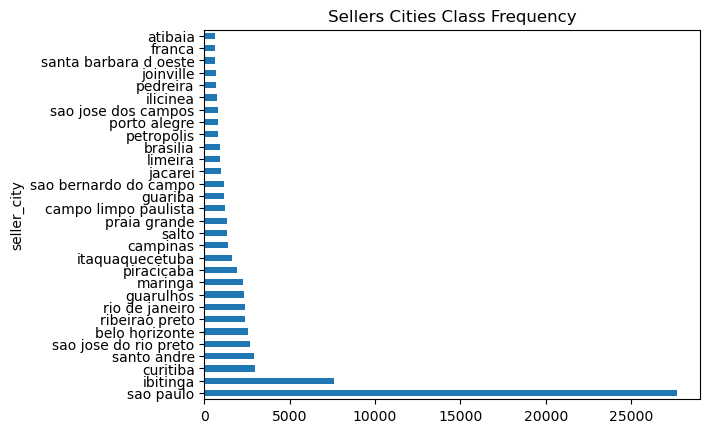

In [58]:
## First 30 city for sellers location
print('Unique sellers cities count: ',df['seller_city'].value_counts().count());
df["seller_city"].value_counts().head(30).plot.barh().set_title("Sellers Cities Class Frequency");

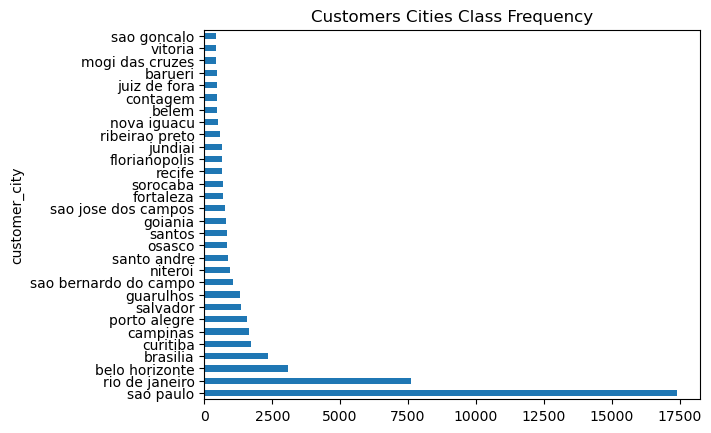

In [60]:
## First 30 city for customers location
df["customer_city"].value_counts().head(30).plot.barh().set_title("Customers Cities Class Frequency");

**The data has a large number of cities. The number of columns will increase greatly after one-hot encoding. We can represent cities by states.**

<Figure size 1200x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

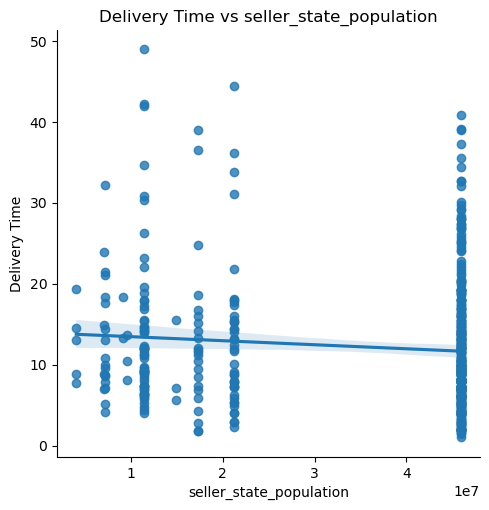

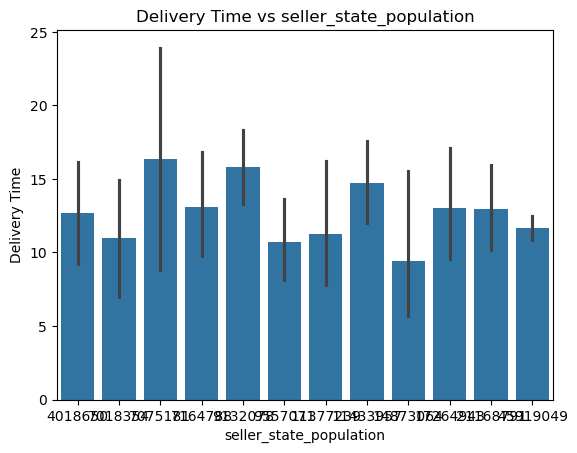

<Figure size 640x480 with 0 Axes>

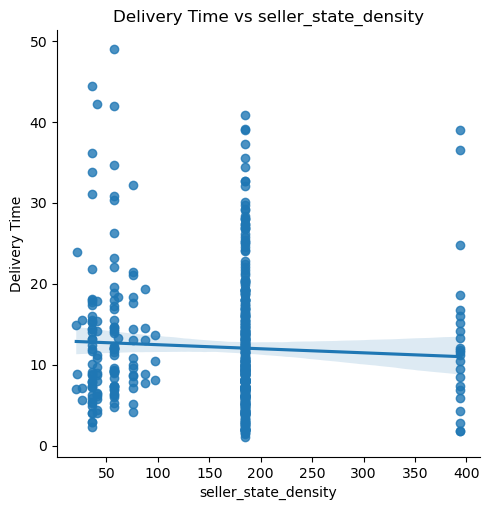

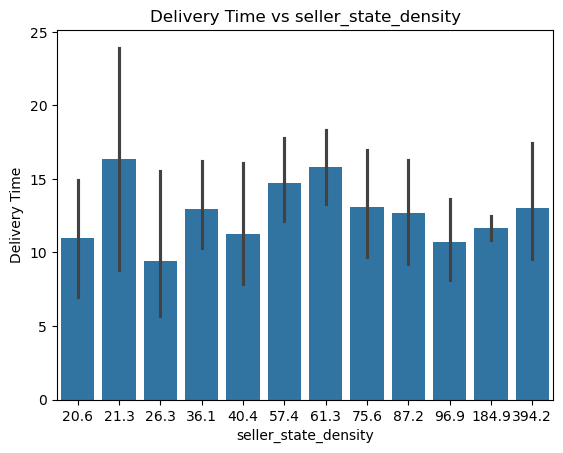

<Figure size 640x480 with 0 Axes>

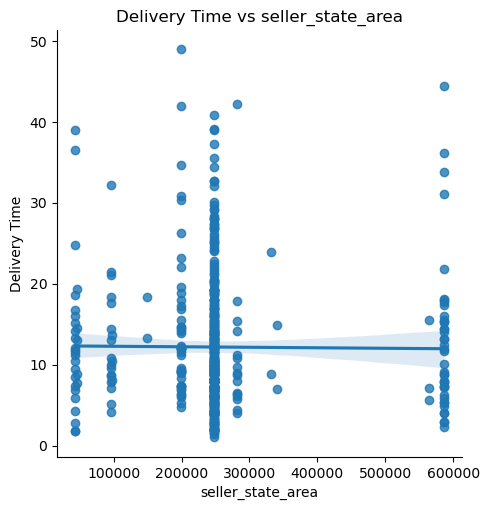

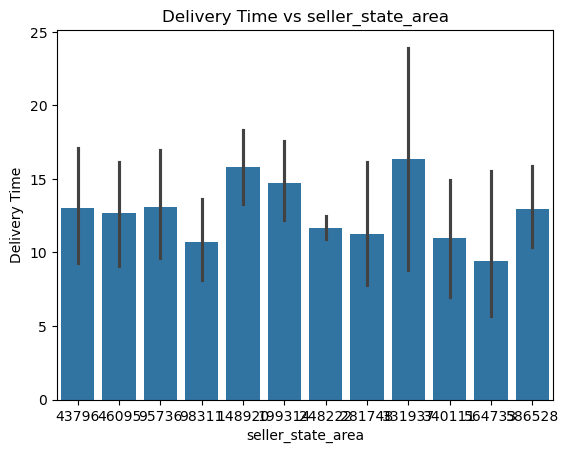

<Figure size 640x480 with 0 Axes>

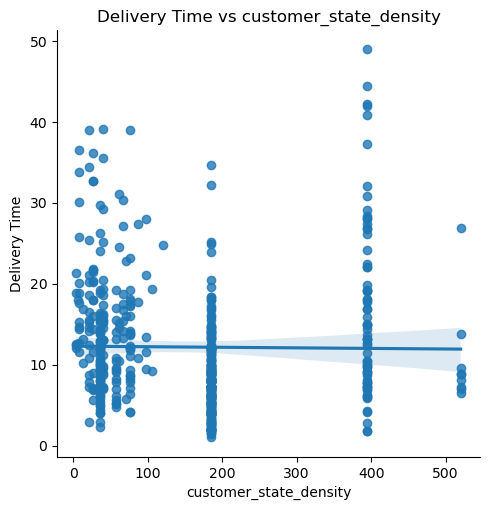

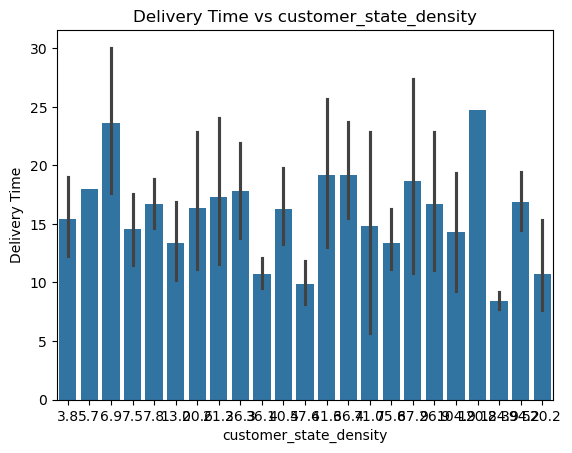

<Figure size 640x480 with 0 Axes>

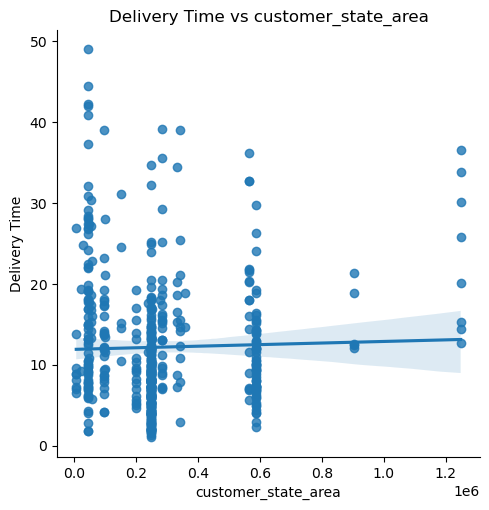

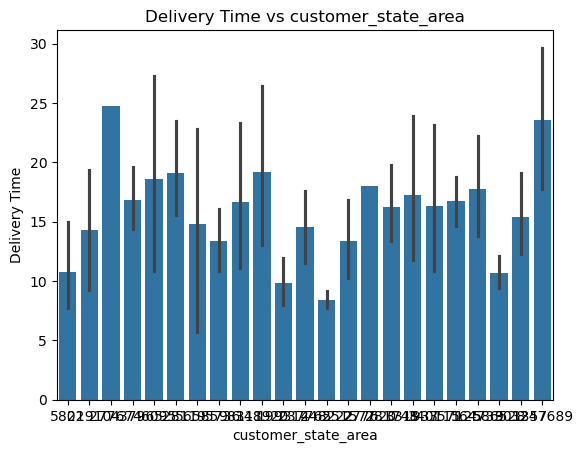

In [64]:
cols=['seller_state_population','seller_state_density','seller_state_area','customer_state_density','customer_state_area']

threshold = 50

# Eşik değerinden yüksek olan verileri filtreleme
filtered_df = df[df['delivery_time'] <= threshold]

df_sample = filtered_df.sample(n=500, random_state=42)

plt.figure(figsize=(12, 8))
for col in cols:
    plt.figure()
    sns.lmplot(y='delivery_time', x=col,data=df_sample)
    plt.title(f'Delivery Time vs {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time')
    plt.show()

    plt.figure()
    sns.barplot(y='delivery_time', x=col, data=df_sample)
    plt.title(f'Delivery Time vs {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time')
    plt.show()


**There is no logical correlation. Additionally, These columns should be deleted from the data because the data contains states names also.**

# Data Selection and Reduction

## Dimensionality Reduction

In [66]:
df_selected=df[['freight_value','cargo_time','cargo_volume_cm3','seller_state','seller_score','customer_state',
    'customer_state_population','states_distance','order_purchase_day','order_delivered_carrier_day','delivery_time']]

In [68]:
df_selected.head()

,freight_value,cargo_time,cargo_volume_cm3,seller_state,seller_score,customer_state,customer_state_population,states_distance,order_purchase_day,order_delivered_carrier_day,delivery_time
0,8.720,2.374,1976.000,SP,4.481,SP,45919049,0.000,Monday,Wednesday,8.437
1,22.760,1.743,4693.000,MG,4.590,BA,14873064,846.430,Tuesday,Thursday,13.782
2,19.220,0.216,9576.000,SP,4.145,GO,7018354,920.910,Wednesday,Wednesday,9.394
3,27.200,3.758,6000.000,MG,4.473,RN,3506853,1757.890,Saturday,Wednesday,13.209
4,8.720,0.936,11475.000,SP,4.113,SP,45919049,0.000,Tuesday,Wednesday,2.874


In [70]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
freight_value,110188.000,19.949,15.699,0.000,13.080,16.260,21.150,409.680
cargo_time,110188.000,3.285,3.611,0.000,1.138,2.230,4.115,125.775
cargo_volume_cm3,110188.000,15173.737,23237.114,168.000,2850.000,6460.000,18144.000,296208.000
seller_score,110188.000,4.109,0.347,1.000,3.963,4.145,4.286,5.000
customer_state_population,110188.000,26871495.477,16917557.290,605761.000,11433957.000,21168791.000,45919049.000,45919049.000
states_distance,110188.000,530.735,593.565,0.000,0.000,447.370,863.090,3448.670
delivery_time,110188.000,12.472,9.445,0.533,6.736,10.184,15.541,209.629


In [72]:
df_selected.isna().sum()

freight_value                  0
cargo_time                     0
cargo_volume_cm3               0
seller_state                   0
seller_score                   0
customer_state                 0
customer_state_population      0
states_distance                0
order_purchase_day             0
order_delivered_carrier_day    0
delivery_time                  0
dtype: int64

# Data Virtualization for Other Columns

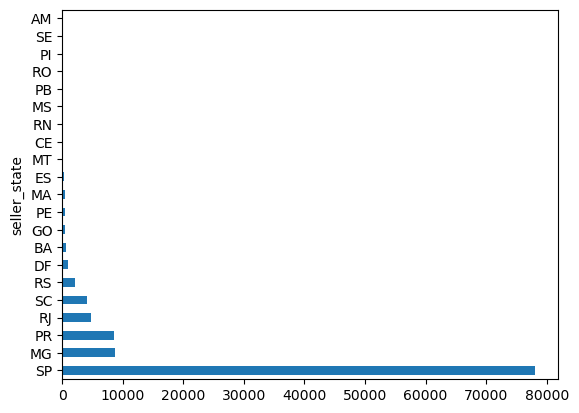

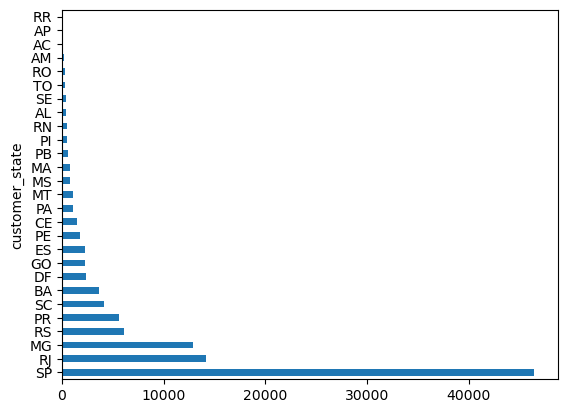

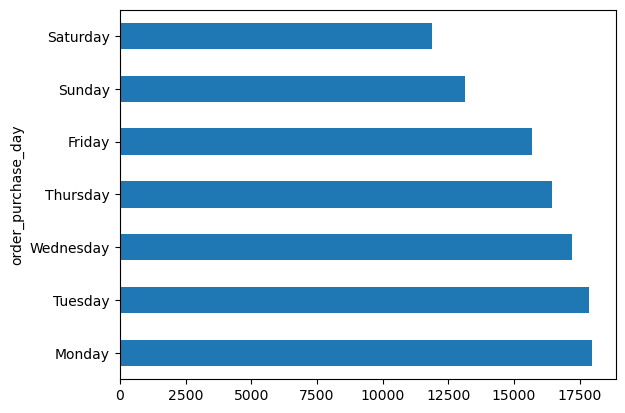

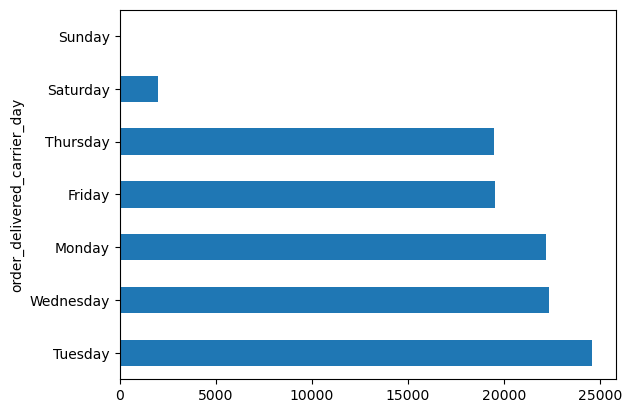

In [74]:
cols=df_selected.select_dtypes(include=['category']).columns
for i in cols:
    df[i].value_counts().plot.barh(); 
    plt.show()

C:\Users\yucel\AppData\Local\Temp\ipykernel_1976\968164536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_selected.delivery_time);


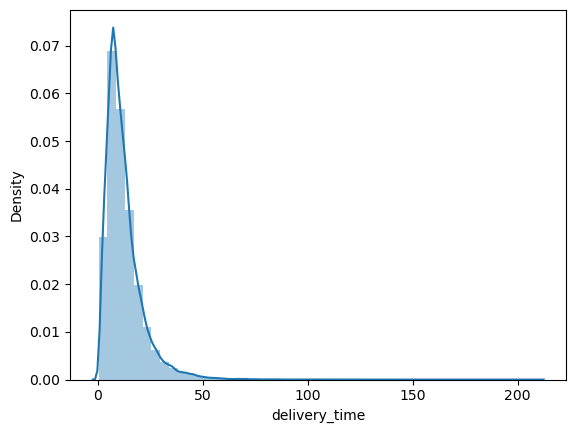

In [76]:
sns.distplot(df_selected.delivery_time);

In [65]:
 sns.lmplot?

Signature:
sns.lmplot(
    data,
    *,
    x=None,
    y=None,
    hue=None,
    col=None,
    row=None,
    palette=None,
    col_wrap=None,
    height=5,
    aspect=1,
    markers='o',
    sharex=None,
    sharey=None,
    hue_order=None,
    col_order=None,
    row_order=None,
    legend=True,
    legend_out=None,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=True,
    x_jitter=None,
    y_jitter=None,
    scatter_kws=None,
    line_kws=None,
    facet_kws=None,
)
Docstring:
Plot data and regression model fits across a FacetGrid.

This function combines :func:`regplot` and :class:`FacetGrid`. It is
intended as a convenient interface to fit regression models across
conditional subsets of a dataset.

When thinking about how to assign variables to 

<Figure size 1200x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

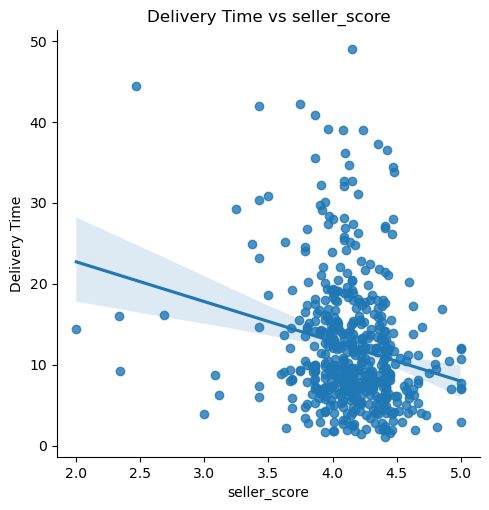

<Figure size 640x480 with 0 Axes>

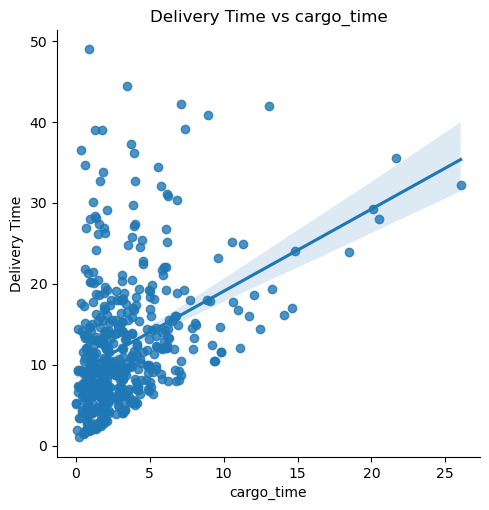

<Figure size 640x480 with 0 Axes>

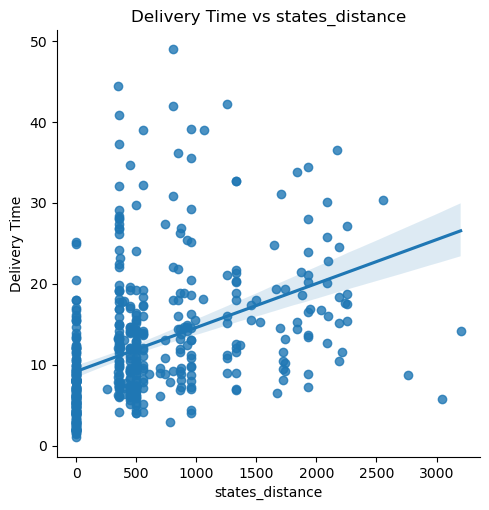

<Figure size 640x480 with 0 Axes>

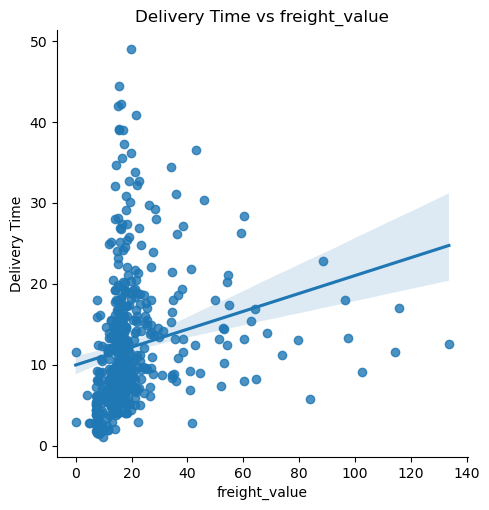

In [151]:
cols=['seller_score','cargo_time','states_distance','freight_value']
threshold = 50

# Eşik değerinden yüksek olan verileri filtreleme
filtered_df = df_selected[df_selected['delivery_time'] <= threshold]

df_sample = filtered_df.sample(n=500, random_state=42)

plt.figure(figsize=(12, 8))
for col in cols:
    plt.figure()
    sns.lmplot(y='delivery_time', x=col,data=df_sample)
    plt.title(f'Delivery Time vs {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time')
    plt.show()


In [67]:
sns.catplot?

Signature:
sns.catplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    kind='strip',
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    units=None,
    weights=None,
    order=None,
    hue_order=None,
    row_order=None,
    col_order=None,
    col_wrap=None,
    height=5,
    aspect=1,
    log_scale=None,
    native_scale=False,
    formatter=None,
    orient=None,
    color=None,
    palette=None,
    hue_norm=None,
    legend='auto',
    legend_out=True,
    sharex=True,
    sharey=True,
    margin_titles=False,
    facet_kws=None,
    ci=<deprecated>,
    **kwargs,
)
Docstring:
Figure-level interface for drawing categorical plots onto a FacetGrid.

This function provides access to several axes-level functions that
show the relationship between a numerical and one or more categorical
variables using one of several visual representations. The `kind`
parameter selects the underlying axes-level function to us

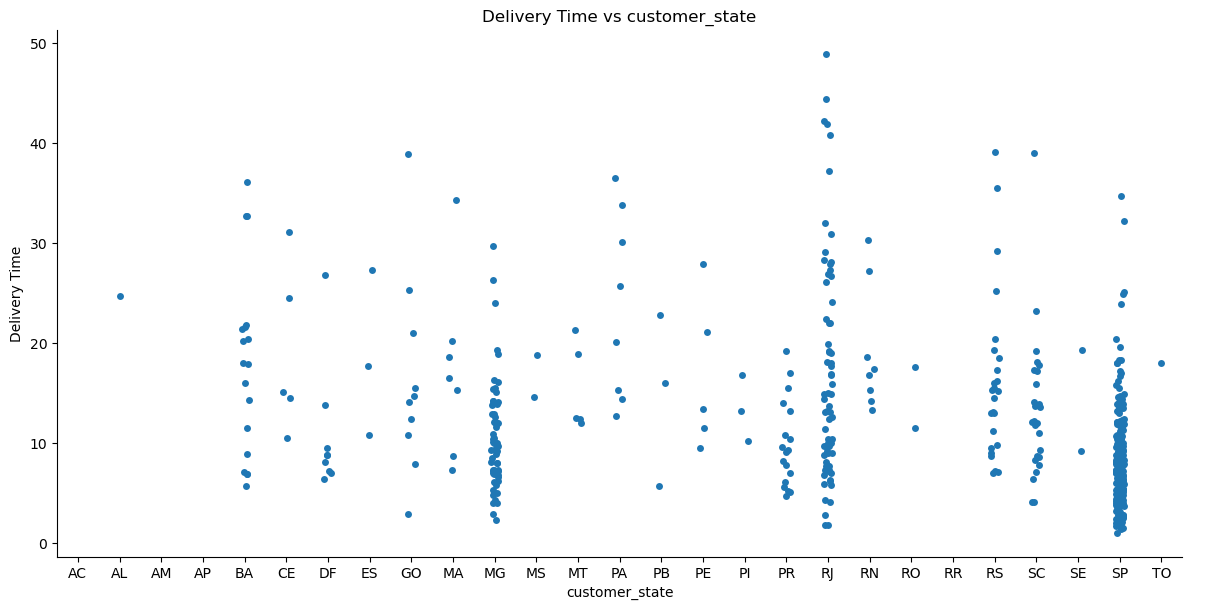

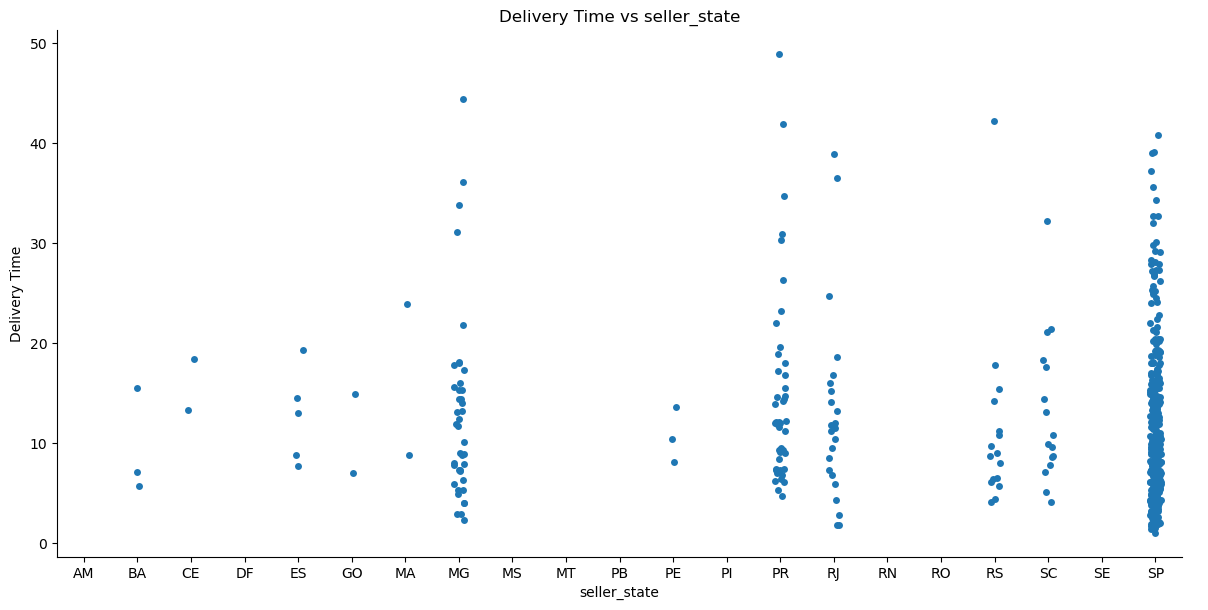

In [78]:
cols=['customer_state','seller_state']

threshold = 50

# Eşik değerinden yüksek olan verileri filtreleme
filtered_df = df_selected[df_selected['delivery_time'] <= threshold]

df_sample = filtered_df.sample(n=500, random_state=42)

for col in cols:
    sns.catplot(y='delivery_time', x=col,data=df_sample,height=6, aspect=2)
    plt.title(f'Delivery Time vs {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time')
    #plt.tight_layout()
    plt.show()
    


<Figure size 640x480 with 0 Axes>

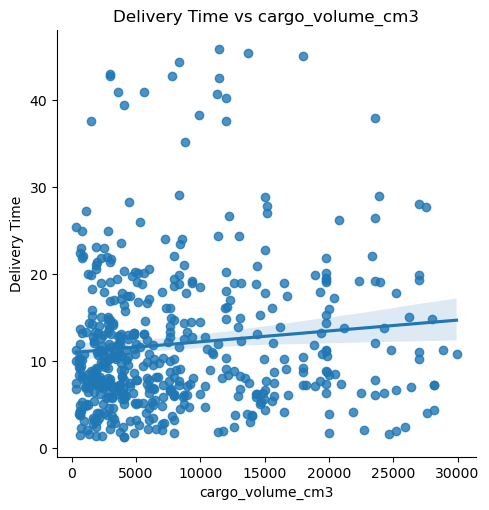

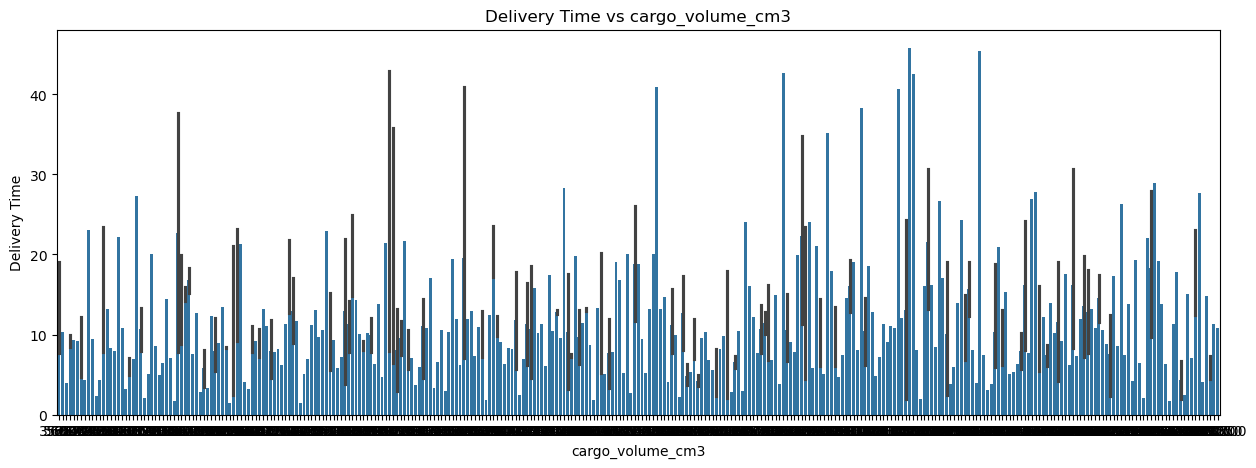

<Figure size 640x480 with 0 Axes>

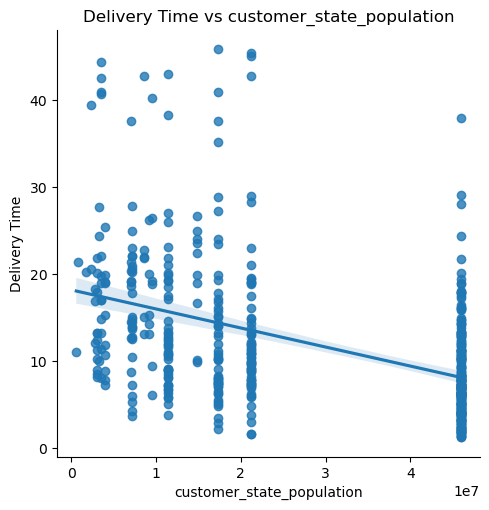

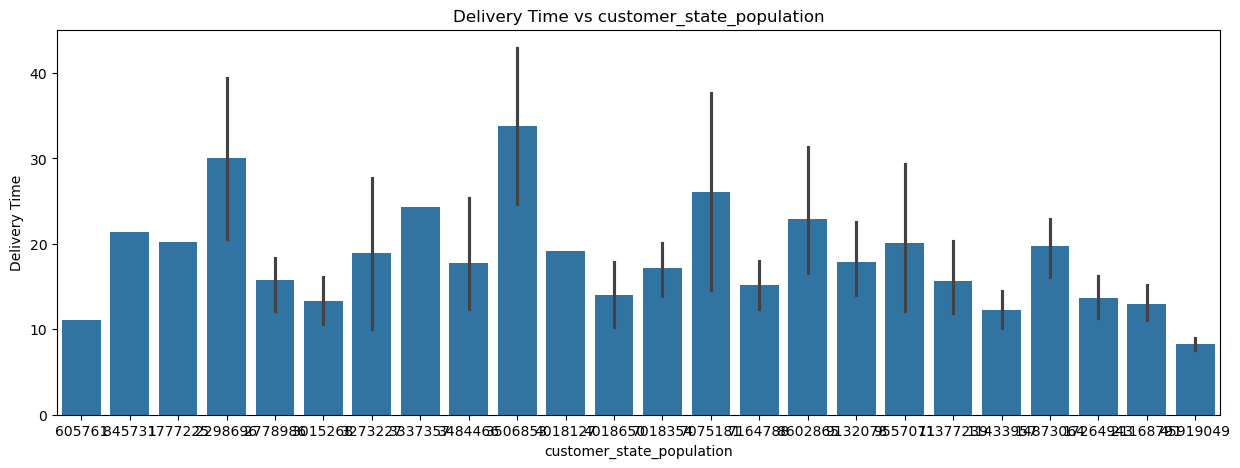

In [80]:
cols=['cargo_volume_cm3','customer_state_population']

threshold_delivery_time = 50
threshold_cargo_volume = 30000

# Eşik değerinden yüksek olan verileri filtreleme
filtered_df = df_selected[(df_selected['delivery_time'] <= threshold) & (df_selected['cargo_volume_cm3'] <= threshold_cargo_volume)]

df_sample = filtered_df.sample(n=500, random_state=42)

for col in cols:
    plt.figure()
    sns.lmplot(y='delivery_time', x=col,data=df_sample)
    plt.title(f'Delivery Time vs {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time')
    plt.show()

    plt.figure(figsize=(15, 5))
    sns.barplot(y='delivery_time', x=col, data=df_sample)
    plt.title(f'Delivery Time vs {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time')
    plt.show()


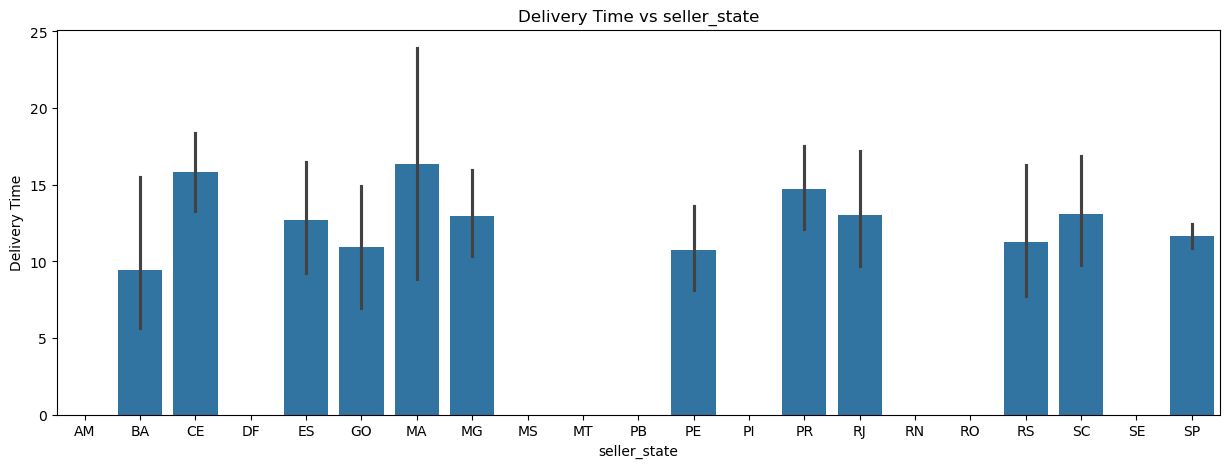

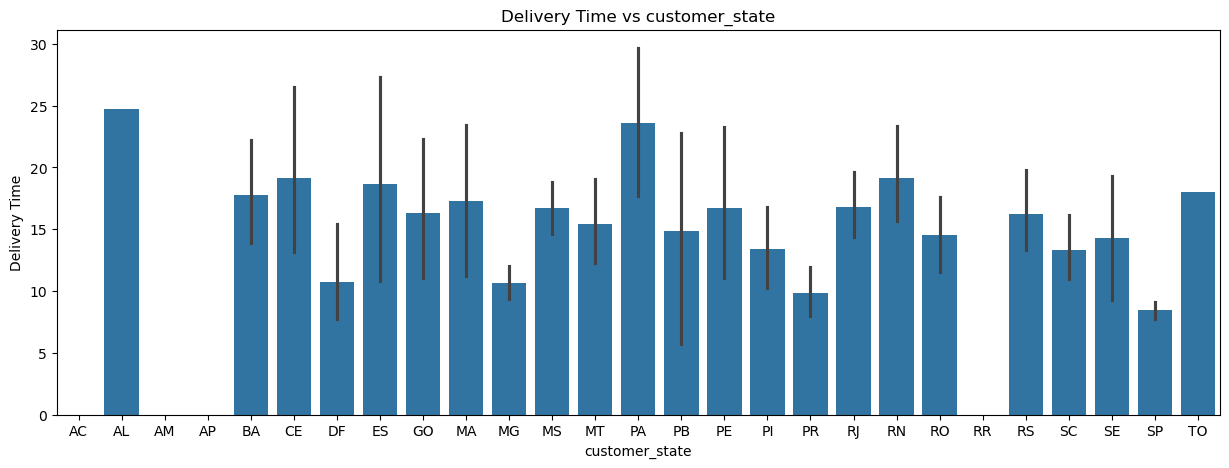

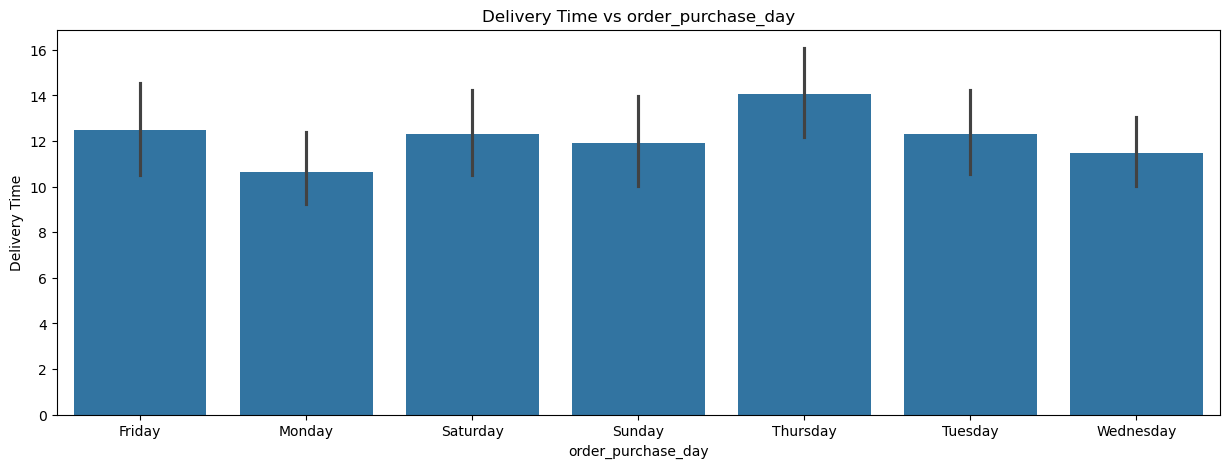

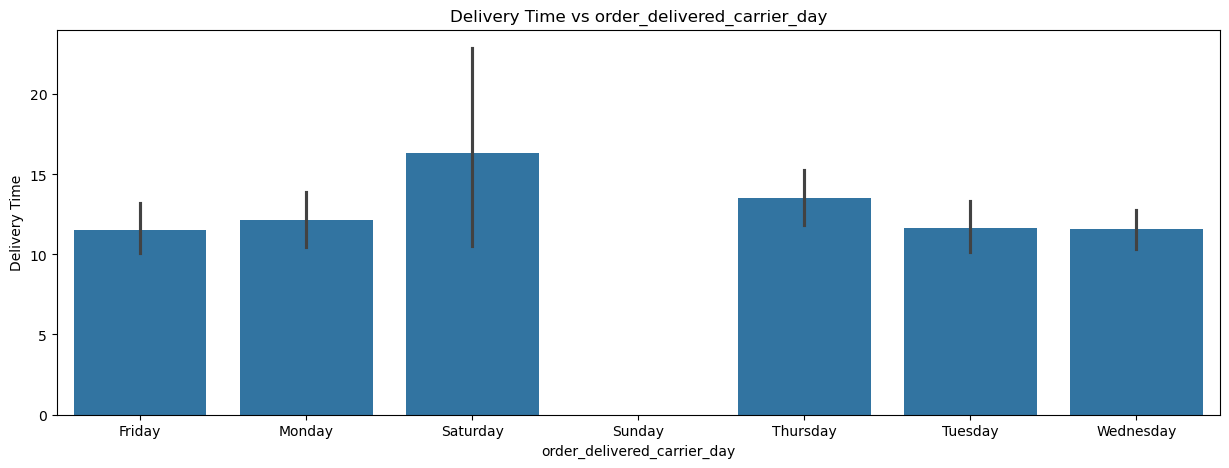

In [82]:
cols=['seller_state','customer_state','order_purchase_day','order_delivered_carrier_day']

threshold_delivery_time = 50

# Eşik değerinden yüksek olan verileri filtreleme
filtered_df = df_selected[df_selected['delivery_time'] <= threshold]

df_sample = filtered_df.sample(n=500, random_state=42)

for col in cols:

    plt.figure(figsize=(15, 5))
    sns.barplot(y='delivery_time', x=col, data=df_sample)
    plt.title(f'Delivery Time vs {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time')
    plt.show()

# Correlation Analysis for Numerical Values

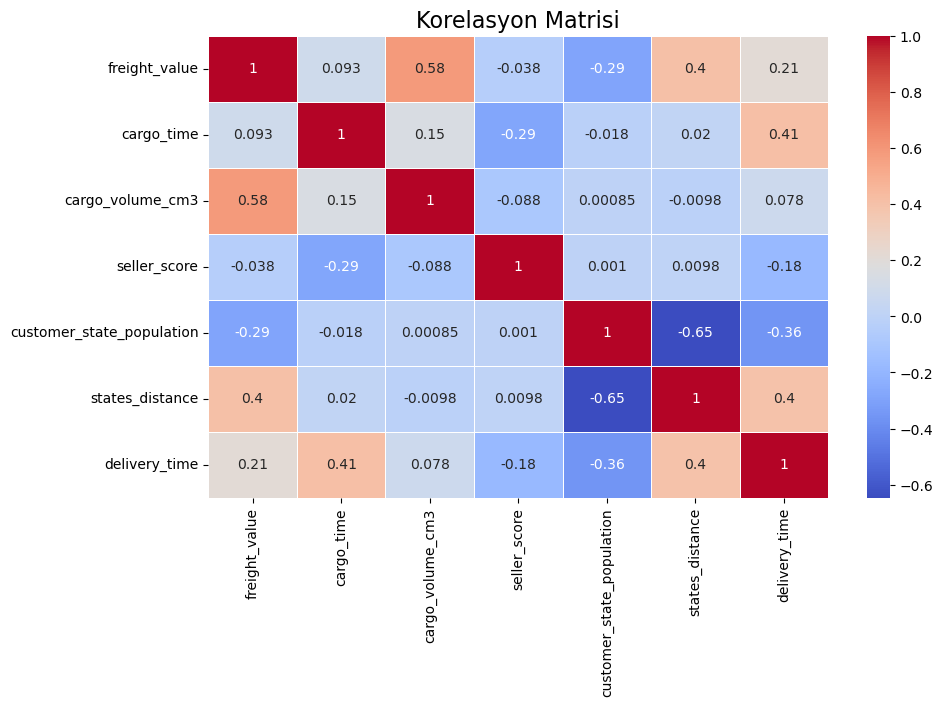

In [84]:
# Korelasyon matrisini hesapla
df_numeric = df_selected.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

# Korelasyon matrisini ısı haritasıyla görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Başlık ekle
plt.title("Korelasyon Matrisi", fontsize=16)

# Grafiği göster
plt.show()

In [86]:
df_selected.head(5)

,freight_value,cargo_time,cargo_volume_cm3,seller_state,seller_score,customer_state,customer_state_population,states_distance,order_purchase_day,order_delivered_carrier_day,delivery_time
0,8.720,2.374,1976.000,SP,4.481,SP,45919049,0.000,Monday,Wednesday,8.437
1,22.760,1.743,4693.000,MG,4.590,BA,14873064,846.430,Tuesday,Thursday,13.782
2,19.220,0.216,9576.000,SP,4.145,GO,7018354,920.910,Wednesday,Wednesday,9.394
3,27.200,3.758,6000.000,MG,4.473,RN,3506853,1757.890,Saturday,Wednesday,13.209
4,8.720,0.936,11475.000,SP,4.113,SP,45919049,0.000,Tuesday,Wednesday,2.874


# Outlier Detection

**We can remove outliers because main aim is not outliers.**

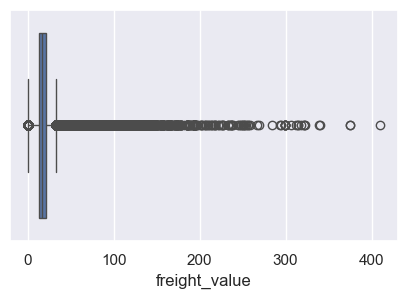

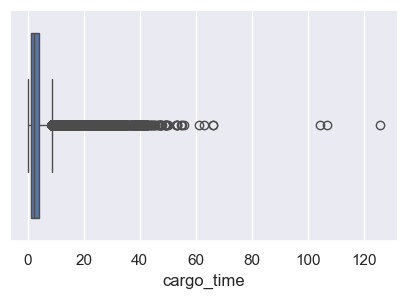

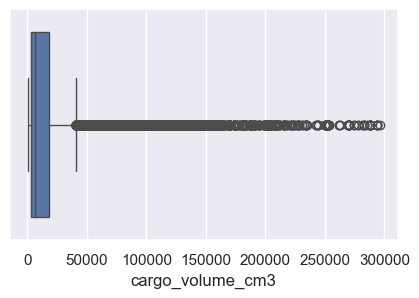

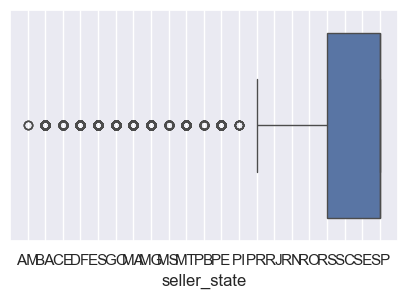

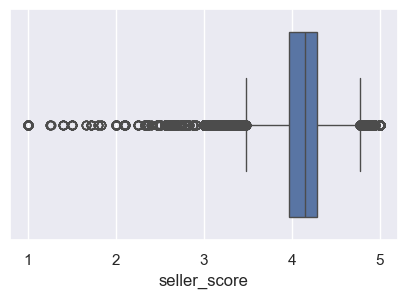

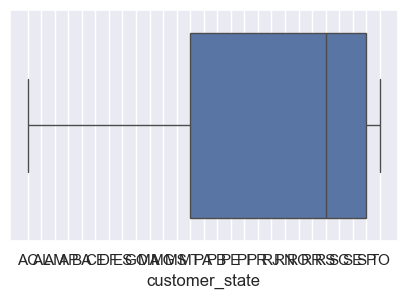

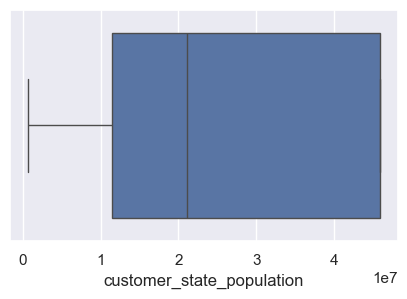

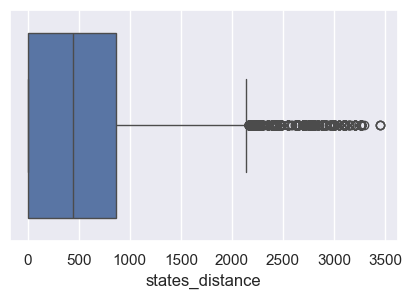

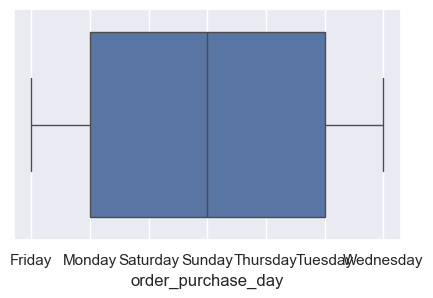

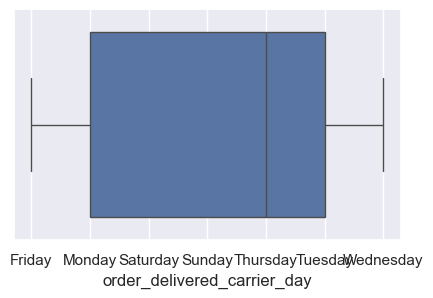

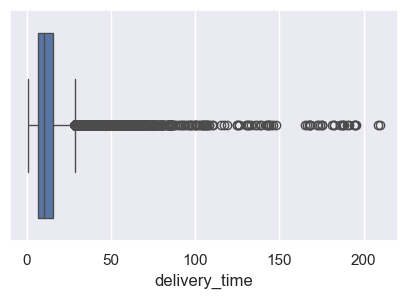

In [88]:
for col in list(df_selected.columns): 
    sns.set(rc = {'figure.figsize':(5,3)})
    sns.boxplot(x= df_selected[col])
    plt.show()

In [90]:
list(df_selected.columns)

['freight_value',
 'cargo_time',
 'cargo_volume_cm3',
 'seller_state',
 'seller_score',
 'customer_state',
 'customer_state_population',
 'states_distance',
 'order_purchase_day',
 'order_delivered_carrier_day',
 'delivery_time']

In [92]:
df_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
freight_value,110188.000,19.949,15.699,0.000,13.080,16.260,21.150,409.680
cargo_time,110188.000,3.285,3.611,0.000,1.138,2.230,4.115,125.775
cargo_volume_cm3,110188.000,15173.737,23237.114,168.000,2850.000,6460.000,18144.000,296208.000
seller_score,110188.000,4.109,0.347,1.000,3.963,4.145,4.286,5.000
customer_state_population,110188.000,26871495.477,16917557.290,605761.000,11433957.000,21168791.000,45919049.000,45919049.000
states_distance,110188.000,530.735,593.565,0.000,0.000,447.370,863.090,3448.670
delivery_time,110188.000,12.472,9.445,0.533,6.736,10.184,15.541,209.629


In [94]:
outliers=pd.DataFrame()
for column in df_selected:
    if(df_selected[column].dtype == np.int64 or df_selected[column].dtype == np.float64):
        Q1 = df_selected[column].quantile(0.25)
        Q3 = df_selected[column].quantile(0.75)
        IQR = Q3-Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        local_outliers=((df_selected[column] < lower_limit) | (df_selected[column] > upper_limit))
        outliers=pd.concat([outliers,df_selected[local_outliers]]).drop_duplicates().reset_index(drop=True)

    
outliers.shape

(26804, 11)

In [96]:
df_cleaned = df_selected[~df_selected.apply(tuple,1).isin(outliers.apply(tuple,1))]
df_cleaned.head()

,freight_value,cargo_time,cargo_volume_cm3,seller_state,seller_score,customer_state,customer_state_population,states_distance,order_purchase_day,order_delivered_carrier_day,delivery_time
0,8.720,2.374,1976.000,SP,4.481,SP,45919049,0.000,Monday,Wednesday,8.437
1,22.760,1.743,4693.000,MG,4.590,BA,14873064,846.430,Tuesday,Thursday,13.782
2,19.220,0.216,9576.000,SP,4.145,GO,7018354,920.910,Wednesday,Wednesday,9.394
3,27.200,3.758,6000.000,MG,4.473,RN,3506853,1757.890,Saturday,Wednesday,13.209
4,8.720,0.936,11475.000,SP,4.113,SP,45919049,0.000,Tuesday,Wednesday,2.874


In [98]:
df_cleaned.isnull().sum()

freight_value                  0
cargo_time                     0
cargo_volume_cm3               0
seller_state                   0
seller_score                   0
customer_state                 0
customer_state_population      0
states_distance                0
order_purchase_day             0
order_delivered_carrier_day    0
delivery_time                  0
dtype: int64

# Normalization

In [100]:
df_norm = df_cleaned.reindex()
numeric_cols = df_norm.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('delivery_time')

min_max_scaler = MinMaxScaler()
min_max_scaler_target = MinMaxScaler()

df_norm[numeric_cols] = min_max_scaler.fit_transform(df_norm[numeric_cols])
df_norm[['delivery_time']] = min_max_scaler_target.fit_transform(df_norm[['delivery_time']])

df_norm.head()

,freight_value,cargo_time,cargo_volume_cm3,seller_state,seller_score,customer_state,customer_state_population,states_distance,order_purchase_day,order_delivered_carrier_day,delivery_time
0,0.240,0.277,0.044,SP,0.776,SP,1.000,0.000,Monday,Wednesday,0.280
1,0.675,0.203,0.111,MG,0.861,BA,0.311,0.395,Tuesday,Thursday,0.470
2,0.565,0.025,0.230,SP,0.515,GO,0.137,0.430,Wednesday,Wednesday,0.314
3,0.813,0.438,0.143,MG,0.770,RN,0.059,0.821,Saturday,Wednesday,0.449
4,0.240,0.109,0.277,SP,0.489,SP,1.000,0.000,Tuesday,Wednesday,0.083


# Tranformation

In [102]:
df_encoded = df_norm
trans_cols=df_norm.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df_encoded, columns=trans_cols, drop_first=True)
df_encoded.head()

,freight_value,cargo_time,cargo_volume_cm3,seller_score,customer_state_population,states_distance,delivery_time,seller_state_BA,seller_state_CE,seller_state_DF,seller_state_ES,seller_state_GO,seller_state_MA,seller_state_MG,seller_state_MS,seller_state_MT,seller_state_PB,seller_state_PE,seller_state_PI,seller_state_PR,seller_state_RJ,seller_state_RN,seller_state_RO,seller_state_RS,seller_state_SC,seller_state_SE,seller_state_SP,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,order_purchase_day_Monday,order_purchase_day_Saturday,order_purchase_day_Sunday,order_purchase_day_Thursday,order_purchase_day_Tuesday,order_purchase_day_Wednesday,order_delivered_carrier_day_Monday,order_delivered_carrier_day_Saturday,order_delivered_carrier_day_Sunday,order_delivered_carrier_day_Thursday,order_delivered_carrier_day_Tuesday,order_delivered_carrier_day_Wednesday
0,0.240,0.277,0.044,0.776,1.000,0.000,0.280,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
1,0.675,0.203,0.111,0.861,0.311,0.395,0.470,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
2,0.565,0.025,0.230,0.515,0.137,0.430,0.314,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,0.813,0.438,0.143,0.770,0.059,0.821,0.449,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4,0.240,0.109,0.277,0.489,1.000,0.000,0.083,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True


C:\Users\yucel\AppData\Local\Temp\ipykernel_1976\1407911042.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encoded.delivery_time);


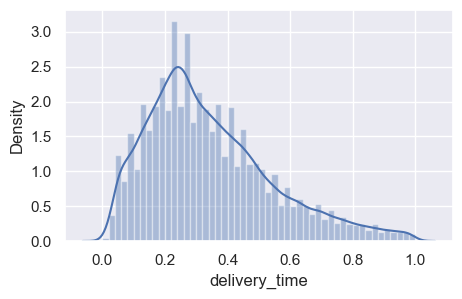

In [104]:
sns.distplot(df_encoded.delivery_time);

In [106]:
list(df_encoded.columns)

['freight_value',
 'cargo_time',
 'cargo_volume_cm3',
 'seller_score',
 'customer_state_population',
 'states_distance',
 'delivery_time',
 'seller_state_BA',
 'seller_state_CE',
 'seller_state_DF',
 'seller_state_ES',
 'seller_state_GO',
 'seller_state_MA',
 'seller_state_MG',
 'seller_state_MS',
 'seller_state_MT',
 'seller_state_PB',
 'seller_state_PE',
 'seller_state_PI',
 'seller_state_PR',
 'seller_state_RJ',
 'seller_state_RN',
 'seller_state_RO',
 'seller_state_RS',
 'seller_state_SC',
 'seller_state_SE',
 'seller_state_SP',
 'customer_state_AL',
 'customer_state_AM',
 'customer_state_AP',
 'customer_state_BA',
 'customer_state_CE',
 'customer_state_DF',
 'customer_state_ES',
 'customer_state_GO',
 'customer_state_MA',
 'customer_state_MG',
 'customer_state_MS',
 'customer_state_MT',
 'customer_state_PA',
 'customer_state_PB',
 'customer_state_PE',
 'customer_state_PI',
 'customer_state_PR',
 'customer_state_RJ',
 'customer_state_RN',
 'customer_state_RO',
 'customer_state_RR',

# Modelling

##  Lineer Regresyon

In [110]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.02426710632751909


### Grid Search

In [261]:
param_grid = {
    'fit_intercept': [True,False], 
    'positive': [True,False]
}

grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi MSE'yi yazdırma
print("Best Params:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

# 5. Sonuçları değerlendirme
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

En iyi parametreler: {'fit_intercept': True, 'positive': True}
En iyi ortalama kare hatası (MSE): 0.02438253311513143
Mean Squared Error (MSE): 0.02463385910560904


## Polynomial Regression

In [112]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

pl_model = LinearRegression()
pl_model.fit(X_poly_train, y_train)

y_pred = pl_model.predict(X_poly_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1.3466072349505037e+18


### Grid Search

In [ ]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'poly__degree': [1,3,5,7],  # Polinom dereceleri
    'model__fit_intercept': [True, False]
}

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Polinom özellikleri
    ('model', LinearRegression())  # Lineer regresyon modeli
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Params:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Best Params: {'model__fit_intercept': True, 'poly__degree': 1}

Mean Squared Error (MSE): 0.02426698778287658

In [452]:
##AFTER GRID SEACRH
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=1,interaction_only=True)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

pl_model = LinearRegression()
pl_model.fit(X_poly_train, y_train)

y_pred = pl_model.predict(X_poly_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.02426698778287658


## Ridge Regression

In [114]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.02427209919187114


### Grid Search

In [464]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],   # Ridge'in cezalandırma parametresi
    'fit_intercept': [True, False],     # Intercept hesaplanıp hesaplanmayacağı
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'],  # Çözücü
    'tol': [1e-3, 1e-4, 1e-5]           # Tolerans değerleri
}


ridge_model = Ridge()

grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, 
                           cv=10, scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Params:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Params: {'alpha': 10.0, 'fit_intercept': True, 'solver': 'lsqr', 'tol': 0.0001}
Mean Squared Error (MSE): 0.02428493854972751


## Lasso Regression

In [126]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso_model = Lasso(alpha=1.0)  # Burada alpha değeri sabit tutuluyor
lasso_model.fit(X_train, y_train)

# Test seti üzerinde tahminler
y_pred = lasso_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.040255053638652345


### Grid Search

In [131]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Lasso'un cezalandırma parametresi
    'fit_intercept': [True, False],                 # Intercept hesaplanıp hesaplanmayacağı
    'max_iter': [1000, 5000, 10000],                # Maksimum iterasyon sayısı
    'tol': [1e-4, 1e-3, 1e-2]                      # Tolerans değerleri
}

lasso_model = Lasso()

grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, 
                           cv=10, scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Params:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best Params: {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'tol': 0.01}
Mean Squared Error (MSE): 0.024809647147514012


## Elastic Net

In [139]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Elastic Net modeli oluşturma ve eğitme
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha ve l1_ratio sabit tutuluyor
elastic_net_model.fit(X_train, y_train)

# Test seti üzerinde tahminler
y_pred = elastic_net_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.040255053638652345


### Grid Search

In [141]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparametre grid'i
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],   # Elastic Net'in ceza teriminin gücü
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],     # L1 ve L2 oranı
    'fit_intercept': [True, False],                  # Intercept hesaplanıp hesaplanmayacağı
    'max_iter': [1000, 5000, 10000],                # Maksimum iterasyon sayısı
    'tol': [1e-4, 1e-3, 1e-2]                      # Tolerans değerleri
}

# Elastic Net modeli oluşturma
elastic_net_model = ElasticNet()

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, 
                           cv=10, scoring='neg_mean_squared_error', verbose=1)

# Modeli eğitim verisi ile eğitme
grid_search.fit(X_train, y_train)

# Best Params bulma
best_params = grid_search.best_params_
print("Best Params:", best_params)

# En iyi model ile test setinde tahmin yapma
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Params: {'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 1000, 'tol': 0.0001}
Mean Squared Error (MSE): 0.024379926088297803


## Random Forest 

In [189]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeRegressor modeli oluşturma ve eğitme
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Test seti üzerinde tahminler
y_pred = tree_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.03866790666735023


### Grid Search

In [227]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparametre grid'i
param_grid = {
    'max_depth': [5, 10],  # Ağacın maksimum derinliği
    'min_samples_split': [2, 5],     # Bir düğümün bölünebilmesi için gereken minimum örnek sayısı
    'min_samples_leaf': [30, 40, 50, 60],    # Yaprak düğümde bulunması gereken minimum örnek sayısı
}

# DecisionTreeRegressor modeli oluşturma
tree_model = DecisionTreeRegressor(random_state=42)

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, 
                           cv=10, scoring='neg_mean_squared_error', verbose=1)

# Modeli eğitim verisi ile eğitme
grid_search.fit(X_train, y_train)

# Best Params bulma
best_params = grid_search.best_params_
print("Best Params:", best_params)

# En iyi model ile test setinde tahmin yapma
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best Params: {'max_depth': 10, 'min_samples_leaf': 60, 'min_samples_split': 2}
Mean Squared Error (MSE): 0.023452655865530747


## Gradient Boosting 

In [229]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Test seti üzerinde tahminler
y_pred = gb_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.02269857125060067


### Grid Search

In [251]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparametre grid'i
param_grid = {
    'n_estimators': [300, 500],  # Ağaç sayısı
    'learning_rate': [0.1, 0.2],  # Öğrenme oranı
    'max_depth': [4, 5],  # Ağaçların maksimum derinliği
    'min_samples_split': [2, 5],  # Bir düğümün bölünebilmesi için gereken minimum örnek sayısı
    'min_samples_leaf': [2, 4],  # Bir yaprak düğümde bulunması gereken minimum örnek sayısı
    'subsample': [0.6, 0.8],  # Her iterasyonda kullanılacak veri oranı
}

# GradientBoostingRegressor modeli oluşturma
gb_model = GradientBoostingRegressor(random_state=42)

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Modeli eğitim verisi ile eğitme
grid_search.fit(X_train, y_train)

# Best Params bulma
best_params = grid_search.best_params_
print("Best Params:", best_params)

# En iyi model ile test setinde tahmin yapma
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.8}
Mean Squared Error (MSE): 0.021127707985115173


## XGBoost

In [253]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost modelini oluşturma ve eğitme
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Test seti üzerinde tahminler
y_pred = xgb_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.021429087967947284


### Grid Search

In [304]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparametre grid'i
param_grid = {
    'n_estimators': [300, 500],  # Ağaç sayısı
    'learning_rate': [0.1, 0.05],  # Öğrenme oranı
    'max_depth': [6, 8],  # Ağaçların maksimum derinliği
    'min_child_weight': [1, 3],  # Düğümdeki minimum örnek ağırlığı
    'subsample': [0.6, 0.8],  # Her iterasyonda kullanılacak veri oranı
    'colsample_bytree': [0.8, 1.0],  # Her ağaç için değerlendirilecek özellik oranı
    'gamma': [0, 0.1]  # Bölünmelerde minimum kayıp azaltma değeri
}

# XGBoost modelini oluşturma
xgb_model = XGBRegressor(random_state=42)

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Modeli eğitim verisi ile eğitme
grid_search.fit(X_train, y_train)

# Best Params bulma
best_params = grid_search.best_params_
print("Best Params:", best_params)

# En iyi model ile test setinde tahmin yapma
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Best Params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.8}
Mean Squared Error (MSE): 0.020553181673114828


## Light GBM

In [237]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

# Test seti üzerinde tahminler
y_pred = lgbm_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 64326, number of used features: 53
[LightGBM] [Info] Start training from score 0.342688
Mean Squared Error (MSE): 0.02188259724882374


### Grid Search

In [273]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparametre grid'i
param_grid = {
    'n_estimators': [500, 700],  # Ağaç sayısı
    'learning_rate': [0.05, 0.1],  # Öğrenme oranı
    'max_depth': [-1],  # Ağaçların maksimum derinliği, -1 sınırsız derinlik anlamına gelir
    'num_leaves': [70, 90],  # Bir ağacın yaprak sayısı
    'min_child_samples': [10, 20],  # Yaprak başına minimum örnek sayısı
    'subsample': [0.6],  # Her iterasyonda kullanılacak veri oranı
    'colsample_bytree': [0.6, 0.8],  # Her ağaç için değerlendirilecek özellik oranı
    'reg_alpha': [0, 0.1],  # L1 regülarizasyon terimi
    'reg_lambda': [0, 0.1]   # L2 regülarizasyon terimi
}

# LGBMRegressor modelini oluşturma
lgbm_model = LGBMRegressor(random_state=42)

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, 
                           cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Modeli eğitim verisi ile eğitme
grid_search.fit(X_train, y_train)

# Best Params bulma
best_params = grid_search.best_params_
print("Best Params:", best_params)

# En iyi model ile test setinde tahmin yapma
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1269
[LightGBM] [Info] Number of data points in the train set: 64326, number of used features: 55
[LightGBM] [Info] Start training from score 0.342688
Best Params: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 10, 'n_estimators': 700, 'num_leaves': 90, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.6}
Mean Squared Error (MSE): 0.02057940138594462


## CatBoost

In [239]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost_model = CatBoostRegressor(random_state=42, verbose=0)  # verbose=0 çıktıların bastırılmasını kapatır
catboost_model.fit(X_train, y_train)

# Test seti üzerinde tahminler
y_pred = catboost_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.021364952753369523


### Grid Search

In [271]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparametre grid'i
param_grid = {
    'iterations': [300, 500],  # Ağaç sayısı
    'learning_rate': [0.05, 0.1],  # Öğrenme oranı
    'depth': [8, 10],  # Ağaçların derinliği
    'l2_leaf_reg': [1, 3],  # L2 regülarizasyon katsayısı
    'border_count': [64, 128],  # Sınır sayısı (ayrık değerlerin sayısı)
    'bagging_temperature': [0, 2],  # Rastgele alt örnekleme sıcaklığı
    'random_strength': [1],  # Rastgeleliğin gücü
}

# CatBoostRegressor modelini oluşturma
catboost_model = CatBoostRegressor(random_state=42, verbose=0)

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, 
                           cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Modeli eğitim verisi ile eğitme
grid_search.fit(X_train, y_train)

# Best Params bulma
best_params = grid_search.best_params_
print("Best Params:", best_params)

# En iyi model ile test setinde tahmin yapma
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best Params: {'bagging_temperature': 0, 'border_count': 128, 'depth': 10, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'random_strength': 1}
Mean Squared Error (MSE): 0.021012091780538165


## SVR 

In [279]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVR modelini oluşturma ve eğitme
svr_model = SVR(kernel='rbf')  # 'rbf' çekirdek fonksiyonu kullanılıyor
svr_model.fit(X_train, y_train)

# Test seti üzerinde tahminler
y_pred = svr_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.02349898540713841


### Grid Search

In [302]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparametre grid'i
param_grid = {
    'kernel': ['poly'],  # Çekirdek türleri
    'C': [0.1],  # Ceza parametresi
    'epsilon': [0.1, 0.5],  # Epsilon-tüplü regresyon
    'gamma': ['scale']  # Çekirdek katsayısı
}

# SVR modelini oluşturma
svr_model = SVR()

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, 
                           cv=2, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Modeli eğitim verisi ile eğitme
grid_search.fit(X_train, y_train)

# Best Params bulma
best_params = grid_search.best_params_
print("Best Params:", best_params)

# En iyi model ile test setinde tahmin yapma
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Params: {'C': 0.1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Mean Squared Error (MSE): 0.023645784711950158


## KNN

In [283]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5)  # Varsayılan olarak 5 komşu kullanıyoruz
knn_model.fit(X_train, y_train)

# Test seti üzerinde tahminler
y_pred = knn_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.026389297169832723


### Grid Search

In [289]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparametre grid'i
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Komşu sayısı
    'weights': ['uniform', 'distance'],  # Ağırlıklandırma türü
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Kullanılacak algoritma
    'p': [1, 2]  # Minkowski mesafe metriği (1=Manhattan, 2=Euclidean)
}

# KNN Regressor modelini oluşturma
knn_model = KNeighborsRegressor()

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, 
                           cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Modeli eğitim verisi ile eğitme
grid_search.fit(X_train, y_train)

# Best Params bulma
best_params = grid_search.best_params_
print("Best Params:", best_params)

# En iyi model ile test setinde tahmin yapma
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
Best Params: {'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Mean Squared Error (MSE): 0.022226978287154666


## Bayes Regression

In [291]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bayesian Ridge modelini oluşturma ve eğitme
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

# Test seti üzerinde tahminler
y_pred = bayesian_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.024279480331198252


### Grid Search

In [295]:
X = df_encoded.drop(columns=['delivery_time']) 
y = df_encoded['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Hiperparametre grid'i
param_grid = {
    'alpha_1': [1e-6, 1e-5],  # Önceki parametre için alfa
    'alpha_2': [1e-5, 1e-4, 1e-3],  # Önceki parametre için beta
    'lambda_1': [1e-5, 1e-4, 1e-3],  # Regresyon parametreleri için lambda
    'lambda_2': [1e-6, 1e-5]   # Regresyon parametreleri için lambda
}

# Bayesian Ridge modelini oluşturma
bayesian_model = BayesianRidge()

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=bayesian_model, param_grid=param_grid, 
                           cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Modeli eğitim verisi ile eğitme
grid_search.fit(X_train, y_train)

# Best Params bulma
best_params = grid_search.best_params_
print("Best Params:", best_params)

# En iyi model ile test setinde tahmin yapma
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best Params: {'alpha_1': 1e-06, 'alpha_2': 0.001, 'lambda_1': 0.001, 'lambda_2': 1e-06}
Mean Squared Error (MSE): 0.024279480530936964


# Success Analysis

**The results show that the best model is XGBoost.**

## Prediction Success After ML

In [308]:
predictions_reshaped = y_pred.reshape(-1, 1)
tests_reshaped = y_test.to_numpy().reshape(-1, 1)

y_pred_original=min_max_scaler_target.inverse_transform(predictions_reshaped)
y_test_original=min_max_scaler_target.inverse_transform(tests_reshaped)

In [310]:
results = pd.DataFrame({'Gerçek Değerler': y_test_original.flatten(), 'Tahmin Edilen Değerler': y_pred_original.flatten()})
results.head()

,Gerçek Değerler,Tahmin Edilen Değerler
0,13.450,14.925
1,14.879,15.651
2,11.254,10.564
3,17.250,16.578
4,8.318,3.236


### Mean Absolute Error

In [312]:
mae = mean_absolute_error(y_test_original.flatten(),y_pred_original.flatten())
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 2.950087720315312


## Real Prediction Success

In [314]:
X_test.head()

,freight_value,cargo_time,cargo_volume_cm3,seller_score,customer_state_population,states_distance,seller_state_BA,seller_state_CE,seller_state_DF,seller_state_ES,seller_state_GO,seller_state_MA,seller_state_MG,seller_state_MS,seller_state_MT,seller_state_PB,seller_state_PE,seller_state_PI,seller_state_PR,seller_state_RJ,seller_state_RN,seller_state_RO,seller_state_RS,seller_state_SC,seller_state_SE,seller_state_SP,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,order_purchase_day_Monday,order_purchase_day_Saturday,order_purchase_day_Sunday,order_purchase_day_Thursday,order_purchase_day_Tuesday,order_purchase_day_Wednesday,order_delivered_carrier_day_Monday,order_delivered_carrier_day_Saturday,order_delivered_carrier_day_Sunday,order_delivered_carrier_day_Thursday,order_delivered_carrier_day_Tuesday,order_delivered_carrier_day_Wednesday
109454,0.387,0.924,0.051,0.483,1.000,0.209,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
82392,0.811,0.825,0.436,0.151,0.451,0.232,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44449,0.603,0.144,0.100,0.574,0.451,0.232,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
22683,0.522,0.719,0.209,0.441,0.451,0.232,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
81544,0.336,0.041,0.455,0.531,1.000,0.000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True


In [316]:
y_test.head()

109454   0.458
82392    0.509
44449    0.380
22683    0.593
81544    0.276
Name: delivery_time, dtype: float64

In [318]:
df.loc[list(y_test.index)].head()

,order_id,order_item_id,freight_value,cargo_time,delivery_time,estimate_time,cargo_volume_cm3,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,seller_state,seller_score,customer_id,customer_city,customer_state,distance_id,seller_state_area,seller_state_population,seller_state_density,customer_state_area,customer_state_population,customer_state_density,states_distance,order_purchase_day,order_delivered_carrier_day
109454,8c3dc89e0f3cb3d2ba28bd9559109b84,1,13.470,7.930,13.450,39.347,2240.000,2018-08-09 15:39:32,2018-08-17 13:59:00,2018-08-23 02:27:51,2018-09-18,6d988d6174a2c27441597174f8905515,maringa,PR,4.105,0e3831c91b42710f9ac7aa1f0e4831f9,guarulhos,SP,PRSP,199314,11433957,57.400,248222,45919049,184.900,447.370,Thursday,Friday
82392,af9590febcbcb2c619ddf09330abc567,1,27.160,7.080,14.879,23.312,18000.000,2017-11-10 16:31:07,2017-11-17 18:26:42,2017-11-25 13:37:05,2017-12-04,6039e27294dc75811c0d8a39069f52c0,osasco,SP,3.677,8346ee415c6478f424a155b23d6dfa5e,juiz de fora,MG,SPMG,248222,45919049,184.900,586528,21168791,36.100,497.630,Friday,Friday
44449,fc2010beb548588d1543ca8adaa132ba,1,20.450,1.237,11.254,21.387,4275.000,2017-10-26 14:42:55,2017-10-27 20:23:49,2017-11-06 20:47:59,2017-11-17,7e93a43ef30c4f03f38b393420bc753a,barueri,SP,4.222,f9067bdf09476acf12c7ea4935a5af52,teofilo otoni,MG,SPMG,248222,45919049,184.900,586528,21168791,36.100,497.630,Thursday,Friday
22683,22cc2d04975ea9d1495ff837953418c3,1,17.840,6.165,17.250,33.437,8712.000,2017-08-05 13:30:05,2017-08-11 17:27:44,2017-08-22 19:30:08,2017-09-08,7142540dd4c91e2237acb7e911c4eba2,penapolis,SP,4.051,8c94ef9d12c761e621097b7836b0503d,piedade do rio grande,MG,SPMG,248222,45919049,184.900,586528,21168791,36.100,497.630,Saturday,Friday
81544,cd3558a10d854487b4f907e9b326a4fc,1,11.810,0.354,8.318,21.642,18750.000,2017-04-12 08:35:12,2017-04-12 17:05:42,2017-04-20 16:12:26,2017-05-04,1b8356dabde1d35e17cef975c3f82730,sao paulo,SP,4.167,0004164d20a9e969af783496f3408652,valinhos,SP,SPSP,248222,45919049,184.900,248222,45919049,184.900,0.000,Wednesday,Wednesday


### Mean Absolute Error

In [320]:
mae = mean_absolute_error(df.loc[list(y_test.index)]['delivery_time'],df.loc[list(y_test.index)]['estimate_time'])
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 12.609773311777142


## Success Comparison

In [322]:
len(y_test)

16082

**As a result of the machine learning algorithm, an improvement was achieved in the estimated cargo delivery date. In the dataset, there is an average deviation of 12,609 days in the estimated delivery date. Thanks to the developed model, this deviation was reduced to 2.950 days.(On the test data set consisting of 16082 data)**

Makine öğrenmesi algoritması sonucu tahmini kargo teslim tarihinde iyileştirme sağlanmıştır. Veri setinde tahmin edilen teslim tarihinde ortalama 12.609 gün sapma olmaktadır. Geliştirilen model sayesinde bu sapma 2.950 güne düşürülmüştür.(16082 veriden oluşan test veri setinde)